# FINAL TASK PROJECT BASED INTERNSHIP IDX PARTNERS DS:<br>BUILD A PREDICTION MODEL TO PREDICT THE CLIENT CREDIT WORTHINESS

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Load Data & Premilinary Data Analysis

In [2]:
# Read the CSV file into a DataFrame(dfloan)
dfloan = pd.read_csv('../data/loan_data_2007_2014.csv', low_memory=False)

# Select th ecolumns of dfoan that have object dtype and store them in categoric
categoric = dfloan.select_dtypes('object')

# Seelct the columns of dfloan that have number dtype and store them in numeric
numeric = dfloan.select_dtypes('number')

# Assign the number of rows and columns to rows and cols variables
rows = dfloan.shape[0]
cols = dfloan.shape[1]

# Print the shape of dfloan
print(f'dfloan Rows: {rows}\ndfloan Columns: {cols}')

# Print sample of 6 rows from dfloan
print('\nData sample showcase:')
display(dfloan.sample(6))

# Print statistical summary of the cateogircal data in dfloan
print('\nCategorical data statistical summary:')
display(categoric.describe())

# Print statistical summary of the numerical data in dfloan
print('\nNumerical data statistical summary:')
display(numeric.describe())

dfloan Rows: 466285
dfloan Columns: 75

Data sample showcase:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
425418,425418,13026307,15058507,9675,9675,9675.0,36 months,18.92,354.26,D,D4,water tech,5 years,MORTGAGE,47000.0,Source Verified,Mar-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,809xx,CO,25.56,0.0,Jun-09,3.0,NaN,64.0,10.0,1.0,9989,68.9,25.0,f,0.00,0.00,10541.54,10541.54,9675.00,866.54,0.0,0.0,0.0,Sep-14,8770.24,NaN,Dec-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,150.0,199051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14500.0,NaN,NaN,NaN
438738,438738,12326085,14318223,10000,10000,10000.0,36 months,12.49,334.49,B,B4,Human Resources Generalist,2 years,MORTGAGE,120000.0,Source Verified,Feb-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,300xx,GA,3.98,0.0,Jul-98,0.0,34.0,22.0,8.0,1.0,1479,26.9,31.0,w,0.00,0.00,10104.09,10104.09,10000.00,104.09,0.0,0.0,0.0,Mar-14,10104.09,NaN,Mar-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,35072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5500.0,NaN,NaN,NaN
280956,280956,30926270,33489445,15000,15000,15000.0,60 months,9.17,312.62,B,B1,Inspector,1 year,MORTGAGE,60000.0,Not Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,553xx,MN,21.62,0.0,Aug-00,0.0,NaN,NaN,11.0,0.0,18961,60.2,23.0,w,11865.83,11865.83,4681.66,4681.66,3134.17,1547.49,0.0,0.0,0.0,Jan-16,312.62,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,288798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31500.0,NaN,NaN,NaN
252732,252732,33671479,36324756,12000,12000,12000.0,36 months,12.39,400.82,C,C1,Senior Program Manager,1 year,RENT,42200.0,Not Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,200xx,DC,16.72,1.0,Mar-03,0.0,12.0,NaN,15.0,0.0,11743,84.5,23.0,w,7851.88,7851.88,5603.22,5603.22,4148.12,1455.10,0.0,0.0,0.0,Jan-16,400.82,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,38916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13900.0,NaN,NaN,NaN
429413,429413,12626617,14688790,28000,28000,28000.0,36 months,10.99,916.56,B,B2,Director,< 1 year,RENT,186000.0,Verified,Mar-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,303xx,GA,15.38,1.0,Aug-99,0.0,13.0,NaN,15.0,0.0,53124,84.3,41.0,w,12790.98,12790.98,19247.76,19247.76,15209.02,4038.74,0.0,0.0,0.0,Jan-16,916.56,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,211564.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63000.0,NaN,NaN,NaN
59151,59151,9010679,10802218,5000,5000,5000.0,36 months,14.30,171.62,C,C1,Programmer,10+ years,RENT,32000.0,Not Verified,Nov-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,967xx,HI,15.53,0.0,Jul-06,0.0,49.0,NaN,8.0,0.0,4429,62.4,13.0,f,1759.67,1759.67,4290.14,4290.14,3240.33,1049.81,0.0,0.0,0.0,Dec-15,171.62,Feb-16,Jan-16,0.0,51.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,16184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7100.0,NaN,NaN,NaN



Categorical data statistical summary:


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285



Numerical data statistical summary:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [20]:
# print all the value counts for each categorical data on dfloan
print('\nCategorical data value counts:')
for col in categoric.columns:
    print(f'{col} value counts:')
    print(categoric[col].value_counts())
    print('=-='*40)


Categorical data value counts:
term value counts:
term
36 months    337953
60 months    128332
Name: count, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
grade value counts:
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
sub_grade value counts:
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64
=-==-==-==-==-==-==-

In [21]:
# Prtin all the value counts for each numerical data on dfloan
print('\nNumerical data value counts:')
for col in numeric.columns:
    print(f'{col} value counts: ')
    print(numeric[col].value_counts())
    print('=-='*40)


Numerical data value counts:
Unnamed: 0 value counts: 
Unnamed: 0
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: count, Length: 466285, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
id value counts: 
id
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: count, Length: 466285, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
member_id value counts: 
member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=

## Preliminary Data Analysis Summary<br>(Statistics summary & Value Counts)

Based on the statistical summary of our dataset, we identified several issues that need to be addressed:

### 1. High Cardinality Columns

The following columns have too many unique values, leading to high cardinality. These will be dropped:

- `url`: Contains unique URLs for each record.
- `desc`: Contains unique descriptions for each record.
- `title`: Contains unique titles for each record.
- `zip_code`: Contains unique zip codes for each record.
- `emp_title`: Contains unique job titles almost for each record.

### 2. Imbalanced Binary Columns

The following binary column is highly imbalanced and will be dropped:

- `pymnt_plan`: Nearly all records are 'n' (99.9%) with very few 'y' (0.00005%).

### 3. Columns with No Variance

The following columns have only one unique value, offering no variance. These will be dropped:

- `application_type`: All records have the same application type.
- `policy_code`: All records have the same policy code.
- `acc_now_delinq`: This column is highly imbalanced with 99.9% of records being '0'. It's considered to have no variance.

### 4. Columns to be Generalized

The following column will be generalized to reduce its cardinality:

- `addr_state`: This column will be generalized to represent regions instead of individual states.

### Mising Values checking

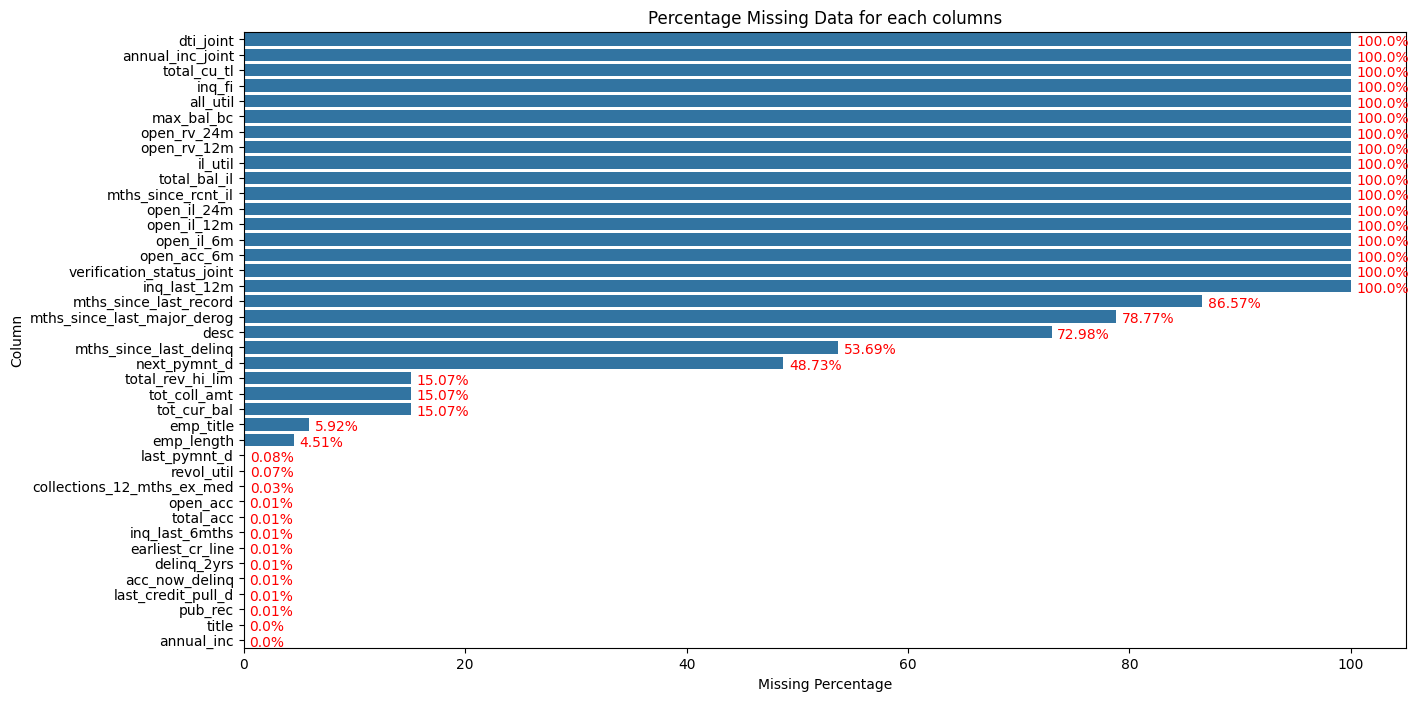

In [50]:
# Calculate the percentage of missing values in each column of dfloan
missing = (dfloan.isnull().sum() / len(dfloan)) * 100

# Filer out the columns that have no missing values
missing = missing[missing > 0]

# Create a DataFrame from the missing data
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing %': np.round(missing.values, 2) # Round the missing percentage to 2 decimal places
}) 

# Sorth the DataFrame by the percentage of missing values in descending order
missing_df = missing_df.sort_values('Missing %', ascending=False)


# Create a bar plot of the missing data
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Missing %', y='Column', data=missing_df)

# Add the percentage of missing data as text on the bars
for i, v in enumerate(missing_df['Missing %']):
    ax.text(v + 0.5, i + .4, str(v) + '%', color='red')

# Set the labels and title of the plot
ax.set_xlabel('Missing Percentage')
ax.set_title('Percentage Missing Data for each columns')

# Display the plot
plt.show()

In [58]:
# Count the number of rows in missing_df where 'Missing %' is greater than 40
len(missing_df[missing_df['Missing %'] > 40])

22

- The data contains a lot of missing values, there's 22 columns that contains missing values more than 40% of the data, for this columns i decided to drop them later because it's too much missing values, and i think it's not valid.

- For the rest of the columns i will consider to fill(impute), drop them after i do furhter analysis on the data.

### Duplicate Values Checking

In [71]:
# print the number of duplicated rows in dfloan
print(dfloan.duplicated().sum())

0


Our data not contains any duplicate values, so we don't need to drop any duplicate values.

### Outlier Checking
This outlier checking it's just a simple checking, because we want to make a scorecard model, outlier can be sensitive to outliers in the data. Outliers can skew the model's parameter estimates, leading to less accurate predictions.

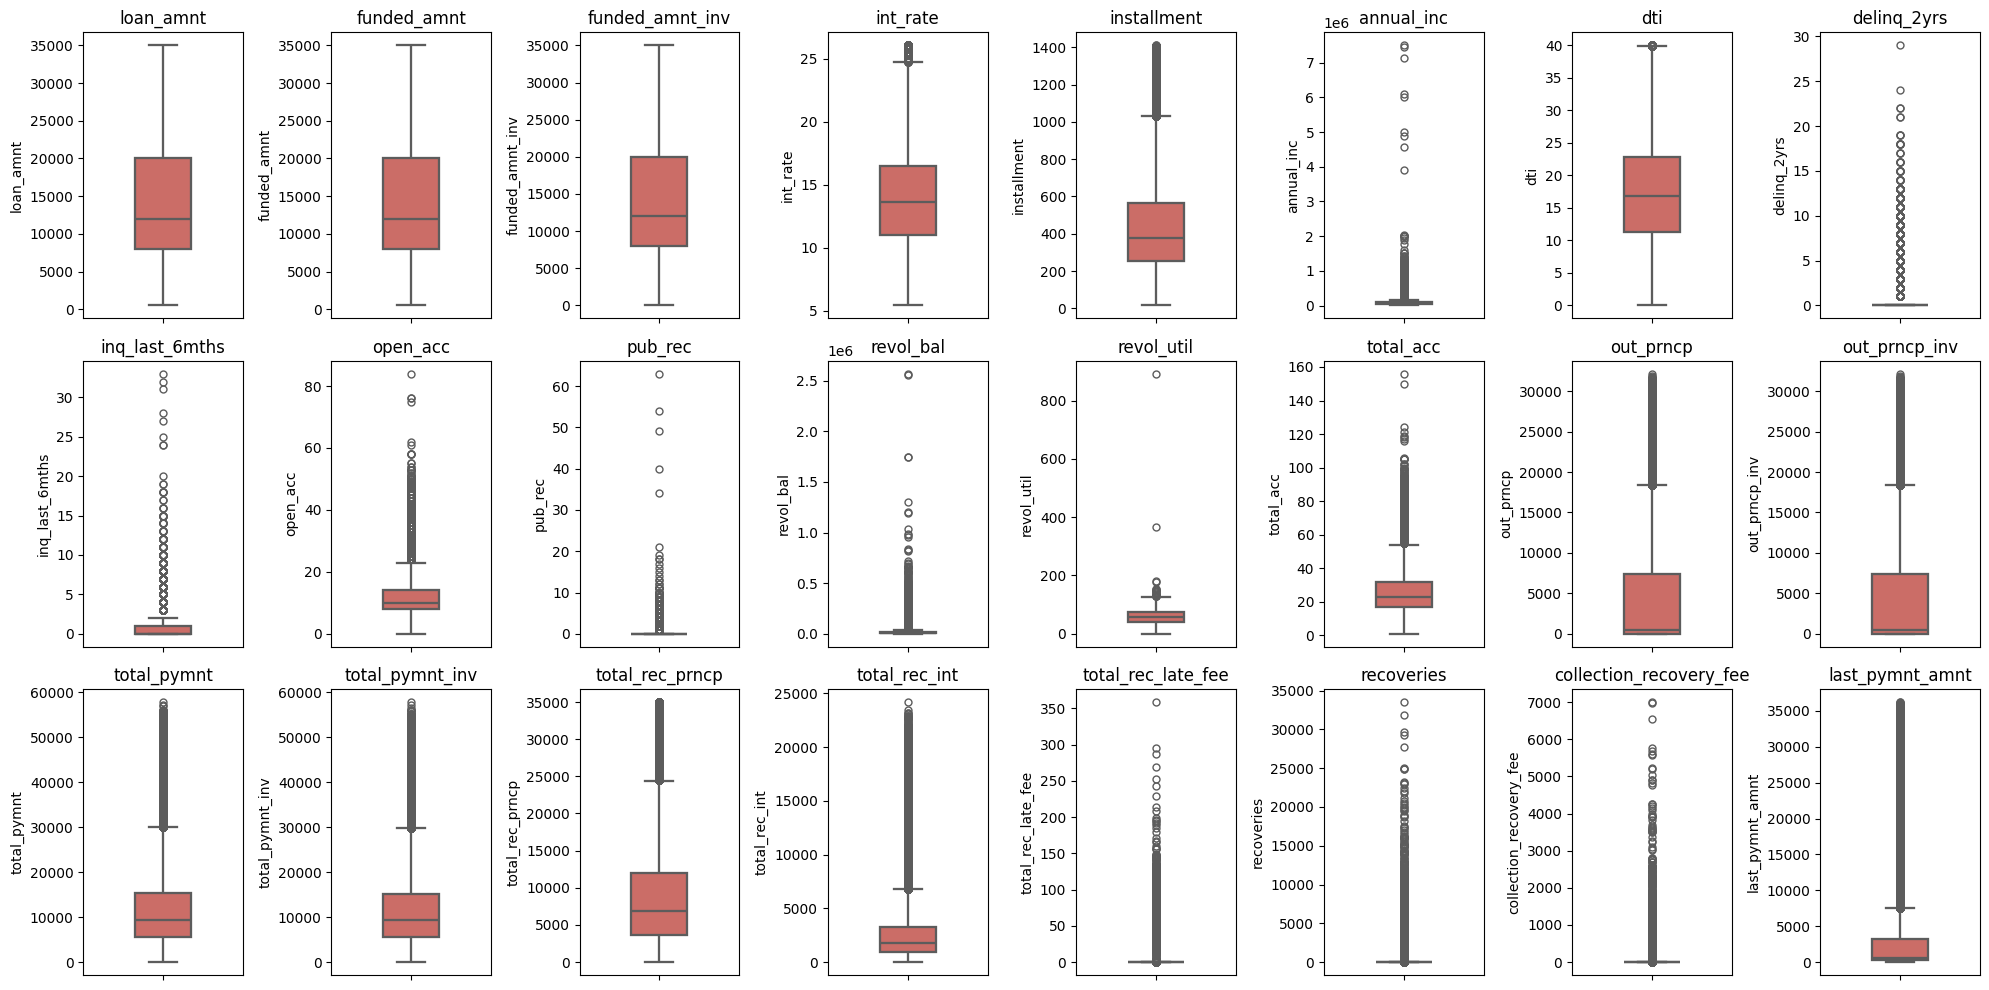

In [3]:
# Create a copy of the numeric DataFrame to avoid modifying the original data
numeric_copy = numeric.copy()

# Drop unnecessary columns from the copied DataFrame
numeric_dropped = numeric_copy.drop(columns=['id', 'member_id', 'Unnamed: 0', 'policy_code', 'acc_now_delinq', 'collections_12_mths_ex_med'])

# Calculate the percentage of missing values in each column
num_mis = (numeric_dropped.isna().sum() / len(dfloan) * 100)

# Filter out the columns with less than 0.4% missing values
low_missing_num = num_mis[num_mis < 0.4]

# Create a new DataFrame with the filtered columns
numeric_new = numeric_copy.loc[:, low_missing_num.index]

# Create a figure with a specific size for plotting
plt.figure(figsize=(20, 10))

# Loop through each column in the new DataFrame
for i, col in enumerate(numeric_new.columns):
    # Create a subplot for each column
    plt.subplot(3, 8, i+1)
    # Create a boxplot for the current column
    sns.boxplot(numeric[col], palette='hls', width=0.35, linewidth=1.65, fliersize=5)
    # Set the title of the subplot to the column name
    plt.title(col)
    # Adjust the layout of the plot
    plt.tight_layout()

# Display the plot
plt.show()

`delinq_2yrs` -> binning

From the boxplot above, we can detect that there's some column that contains outliers:
- `annual_inc`
- `delinq_2yrs`
- `inq_last_6mths`
- `open_acc`
- `pub_rec`
- `revol_bal`
- `revol_util`
- `total_acc`
- `total_rec_fee`
- `recoveries`
- `collection_recovery_fee`

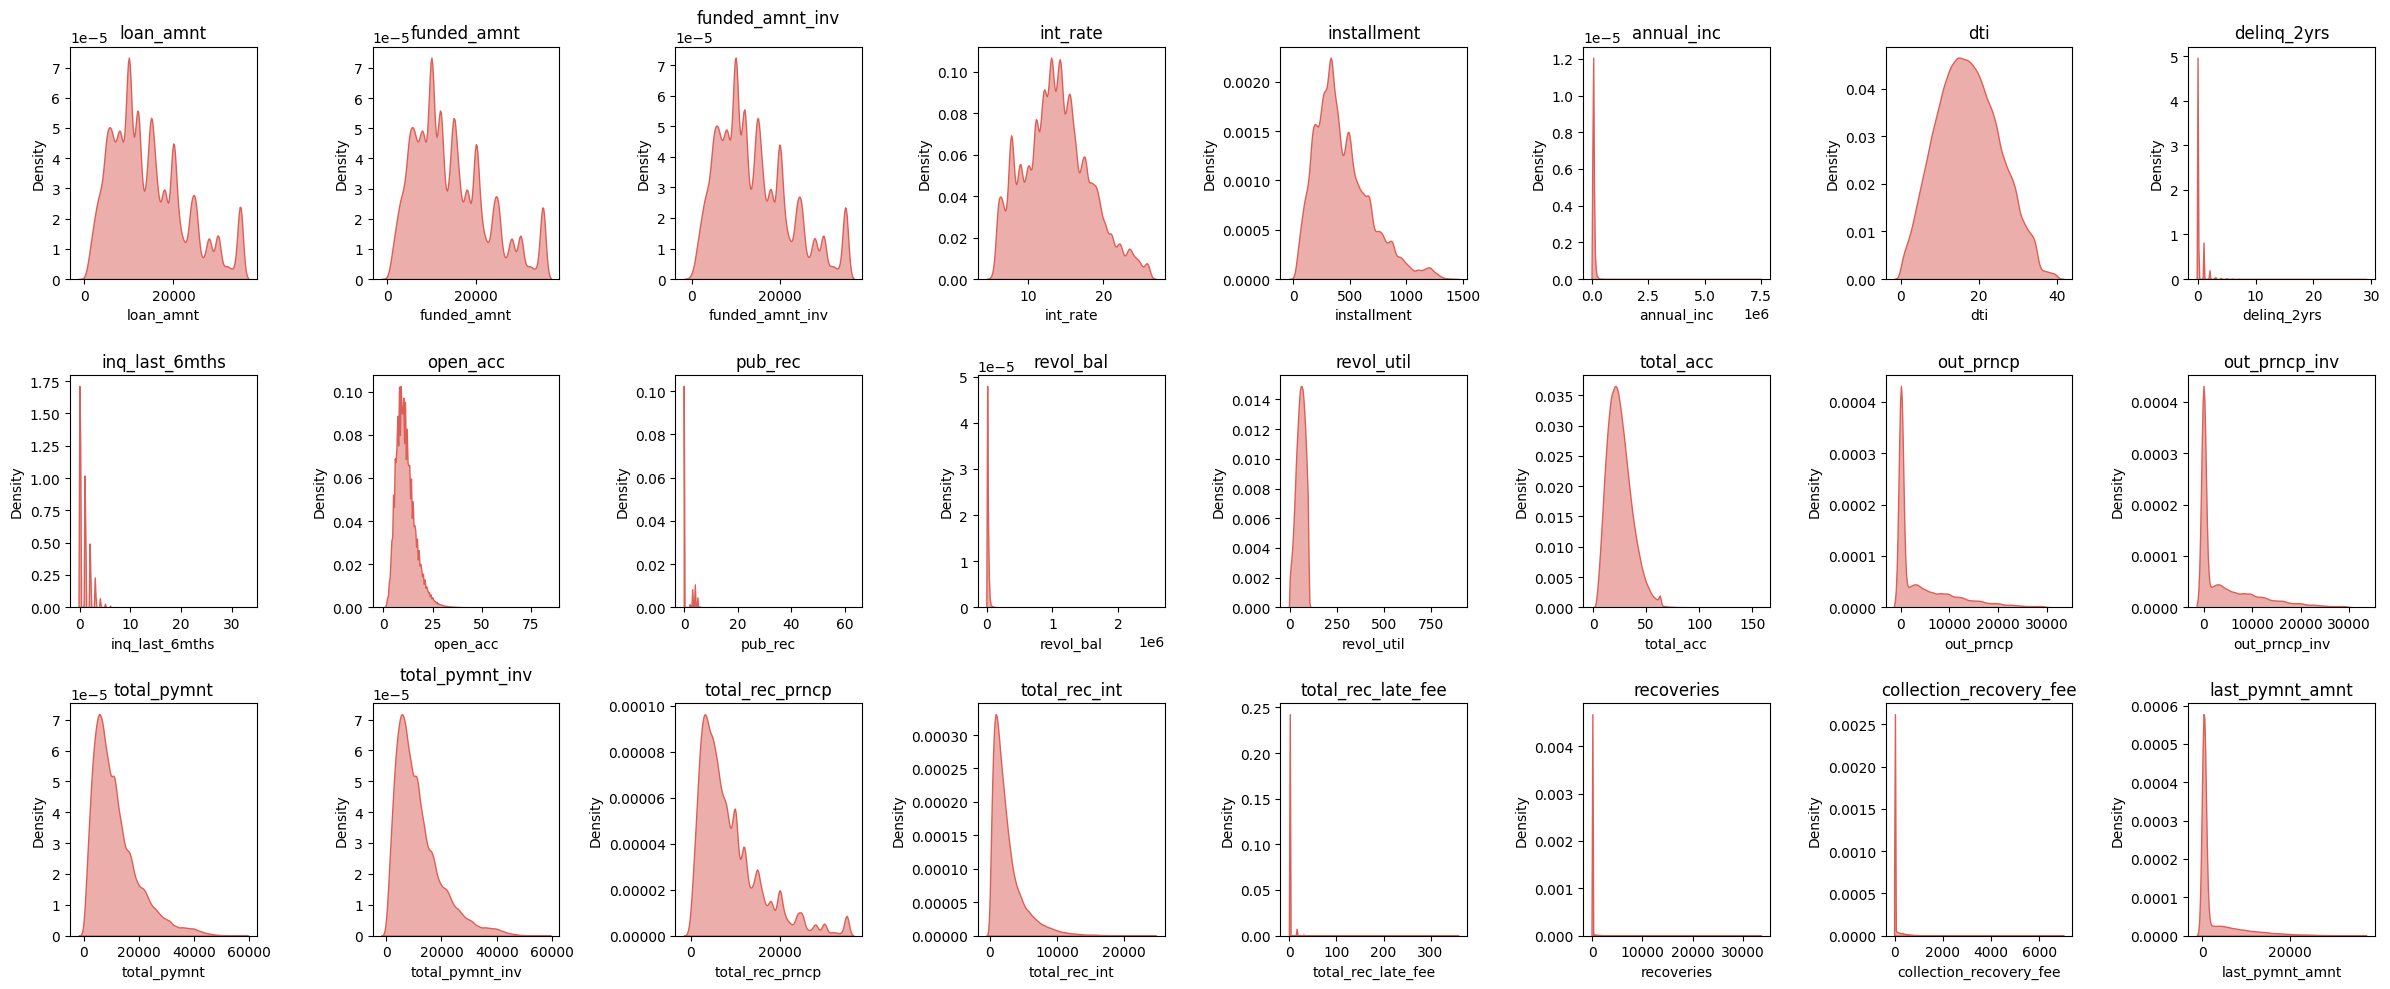

In [39]:
# create kdeplot 3x9 grid of the numeric DataFrame
plt.figure(figsize=(24, 10))
for i, col in enumerate(numeric_new.columns):
    plt.subplot(3, 8, i+1)
    sns.kdeplot(numeric[col], color='#db5f57', shade=True, alpha=0.5)
    plt.title(col)
    plt.tight_layout()

# Display the plot 
plt.show()

most of our numerical data distributios are positively skewed, for columns with <40% missing values, the values will be imputed with median, and for columns with >40% missing values, the columns will be dropped.

### Loan Status distribution

In [9]:
dfloan.loan_status.value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

I decided to make Loan status feature as our target variable, because the value is reasonable eg: Fully Paid, Current, Default, Charged Off, etc., so i will bin the value to 2 categories, wich is bad loan and good loan based on the value of the loan status :
- Bad Loan : Default, Charged Off, Late (31-120 days), Late (16-30 days), Does not meet the credit policy. Status:Charged Off, In Grace Period

- Good Loan : Fully Paid, Current, Does not meet the credit policy. Status:Fully Paid

Let's visualize the distribution of the loan status, and aggregate the total loan amount received by the loan status, to see wich loan status that have the most loan amount received.

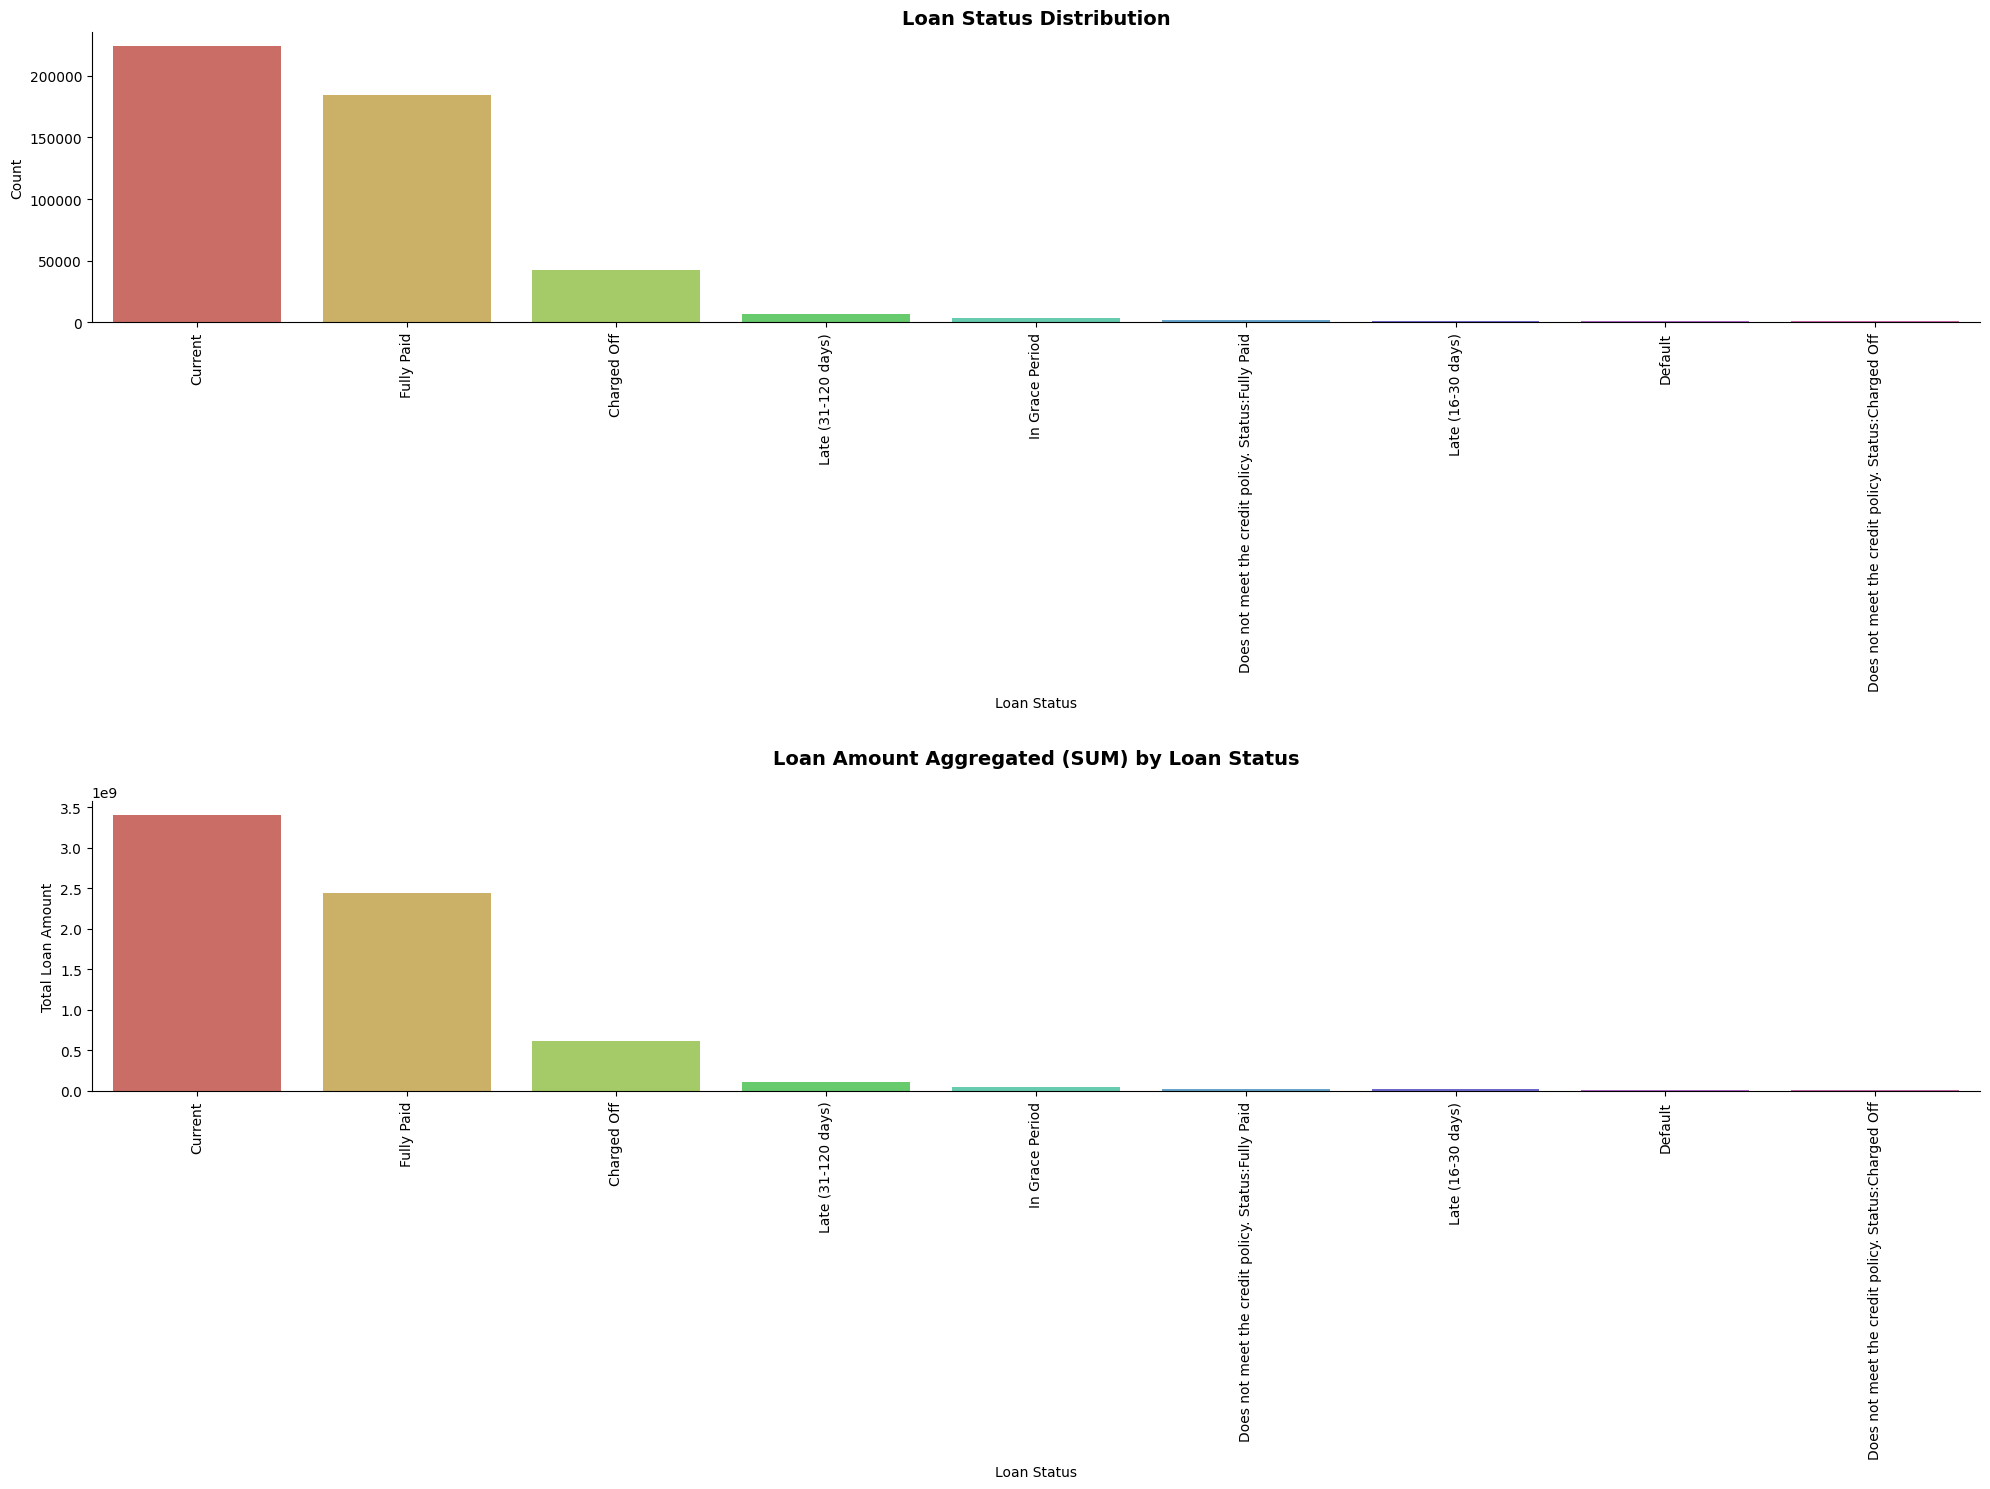

In [10]:
# Create a pie chart of the loan_status column
plt.figure(figsize=(20, 15))

loan_status_values = dfloan['loan_status'].value_counts()
loan_status_labels = loan_status_values.index

plt.subplot(2, 1, 1)
sns.countplot(x='loan_status', data=dfloan, palette='hls', order=loan_status_labels)
plt.title('Loan Status Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.xticks(rotation=90)


plt.subplot(2, 1, 2)
sum_loan = dfloan.groupby('loan_status')['loan_amnt'].sum().to_frame().reset_index().rename(columns={'loan_amnt': 'total_loan_amount'})
sns.barplot(x='loan_status', y='total_loan_amount', data=sum_loan, palette='hls', order=loan_status_labels)

sns.despine()
plt.title('Loan Amount Aggregated (SUM) by Loan Status', fontsize=14, fontweight='bold', y=1.1)
plt.ylabel('Total Loan Amount')
plt.xlabel('Loan Status')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Insight🔎:**
- Current and Fully paid loan status is the most common in our data, from this we can already see that the loan status is imbalanced,
- From the sum aggregated loan amount by loan status, we can see that the most loan amount received is from Current and Fully Paid loan status again. 

In [15]:
# Dropping unnecessary columns from the dataframe
dfloan = dfloan.drop(columns=['id', 'member_id', 'Unnamed: 0'], axis=1)

# Define a function to map loan status to 'Good Loan' or 'Bad Loan'
def map_loan_status(status):
    """
    Function to map loan status to 'Bad Loan' or 'Good Loan'.
    
    Parameters:
    status (str): The loan status to be mapped.
    
    Returns:
    str: 'Bad Loan' if the status is in the list of default statuses, 'Good Loan' otherwise.
    """
    
    # List of loan statuses that imply a default
    default_statuses = [
        'Charged Off', 
        'Late (31-120 days)', 
        'Late (16-30 days)',
        'Default',
        'Does not meet the credit policy. Status:Charged Off'
    ]
    
    # Return 'Bad Loan' if the status is in the list of default statuses, 'Good Loan' otherwise
    return 'Bad Loan' if status in default_statuses else 'Good Loan'

# Apply the map_loan_status function to each status in the 'loan_status' column
dfloan['loan_status'] = dfloan['loan_status'].apply(map_loan_status)

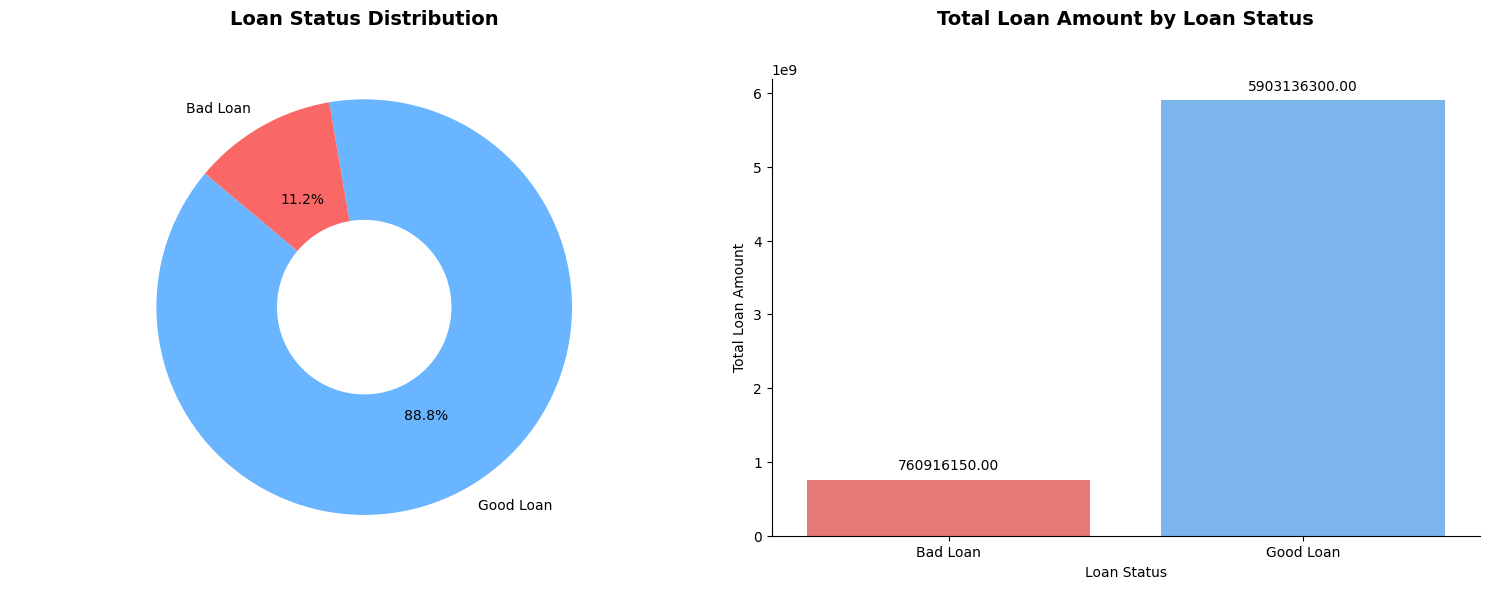

In [38]:
# Create a pie chart of the loan_status column
plt.figure(figsize=(15, 6))

loan_status_values = dfloan['loan_status'].value_counts()
loan_status_labels = loan_status_values.index

plt.subplot(1, 2, 1)
target_colors = ['#69B5FF','#FA6767']
plt.pie(
    loan_status_values,
    labels=loan_status_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=target_colors,
    wedgeprops=dict(width=0.58)
)
plt.title('Loan Status Distribution', y=1.1, fontsize=14, fontweight='bold')
plt.ylabel('')
plt.axis('equal')


plt.subplot(1, 2, 2)
sum_funded = dfloan.groupby('loan_status')['funded_amnt'].sum().to_frame().reset_index().rename(columns={'funded_amnt': 'total_funded_amount'})
barplot = sns.barplot(x='loan_status', y='total_funded_amount', data=sum_funded, palette=[target_colors[1], target_colors[0]])

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

sns.despine()
plt.title('Total Loan Amount by Loan Status', fontsize=14, fontweight='bold', y=1.1)
plt.ylabel('Total Loan Amount')
plt.xlabel('Loan Status')

plt.tight_layout()
plt.show()

**Insight🔎:**
- As said before the target is imbalanced, after we bin the loan status to Good loan and Bad Loan, we can see that the Good Loan proportion is 88.8% and the Bad Loan proportion is 11.2%,
- From the Aggregated (Sum) loan amount by Good Loan and Bad Loan, Total Loan payment amount received from the good loan **5,912,713,975 USD** and from the bad loan we lost **763,217,800 USD**.

### Define Function to plot 

#### Function to plot stacked bar chart

In [25]:
def create_stacked_barchart(data, value_col, status_col, order=None, target_colors=None, bbox_to_anchor=None):
    """
    Creates a stacked bar chart showing the proportion of good and bad loans for each category in a specified column.

    Parameters:
    data (DataFrame): The data to plot.
    value_col (str): The name of the column in 'data' that contains the categories for the x-axis.
    status_col (str): The name of the column in 'data' that contains the loan status.
    order (list, optional): The order in which to display the categories on the x-axis. If None, the categories are displayed in the order they appear in 'data'.
    target_colors (list, optional): A list of two colors to use for the 'Good Loan' and 'Bad Loan' bars. If None, the default colors are used.
    bbox_to_anchor (tuple, optional): The anchor point for the legend. If None, the legend is placed in the upper right corner.

    Returns:
    None
    """
    # Calculate the proportion of each loan status within each group
    lstatus_props = data.groupby(value_col)[status_col].value_counts().unstack()

    # Reindex lstatus_props according to the provided order
    lstatus_props = lstatus_props.reindex(order)

    # Normalize the counts to get the proportion and convert to percentages
    lstatus_props = (lstatus_props.div(lstatus_props.sum(axis=1), axis=0) * 100)

    # Create the 'Good Loan' bars
    bars1 = plt.bar(lstatus_props.index, lstatus_props['Good Loan'], color=target_colors[0], label='Good Loan')

    # Create the 'Bad Loan' bars
    bars2 = plt.bar(lstatus_props.index, lstatus_props['Bad Loan'], bottom=lstatus_props['Good Loan'], color=target_colors[1], label='Bad Loan')

    # Calculate total height of each bar
    total = [i+j for i,j in zip(lstatus_props['Good Loan'], lstatus_props['Bad Loan'])]

    # Add percentage annotations only for 'Bad Loan'
    for bar1, bar2, total in zip(bars1, bars2, total):
        percentage2 = bar2.get_height() / total * 100
        plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height() - 5, f'{percentage2:.1f}%', ha='center', va='bottom', color='black')

    # Set the title and labels
    plt.title(f"Client's Default Rate Compared by Their {value_col.replace('_', ' ').title()}", y=1.09, fontsize=18, fontweight='bold')
    plt.xlabel(f'{value_col.replace("_", " ").title()}', fontsize=12.5, loc='right')
    plt.ylabel('Percentage of Clients', fontsize=12.5)

    # Get current axes and make the top spine invisible
    plt.gca().spines['top'].set_visible(False)

    # Get current axes and make the right spine invisible
    plt.gca().spines['right'].set_visible(False)

    # Add a legend
    plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=bbox_to_anchor)

#### Function to create lineplot

In [26]:
def create_lineplot(x, y, data, hue=None, target_colors=None, bbox_to_anchor=None):
    """
    Creates a line plot for the given data.

    Parameters:
    x (str): The name of the column in 'data' to be used for the x-axis.
    y (str): The name of the column in 'data' to be used for the y-axis.
    data (DataFrame): The data to plot.
    hue (str, optional): The name of the column in 'data' to be used for color encoding. If None, no hue encoding is applied.
    target_colors (list, optional): A list of colors to use for the different levels of the 'hue' variable. If None, the default colors are used.
    bbox_to_anchor (tuple, optional): The anchor point for the legend. If None, the legend is placed in the upper right corner.

    Returns:
    None
    """
    # Create a line plot of loan amounts and annual income by employment length
    sns.lineplot(x=x, y=y, data=data, palette=target_colors, ci=None, hue=hue)

    # Set the title and labels
    plt.title(f'{hue.replace("_", " ").title()} {y.replace("_", " ").title()} by {x.replace("_", " ").title()}', fontsize=18, fontweight='bold', y=1.09)
    plt.xlabel(f'{x}', fontsize=12.5, labelpad=10, loc='right')
    plt.ylabel(f'{y.replace("_", " ").title()}', fontsize=12.5)

    # Add a legend
    plt.legend(title=hue.replace("_", " ").title(), loc='upper right', bbox_to_anchor=bbox_to_anchor)

    # Remove the top and right spines from plot
    sns.despine()

#### Function to create countplot and barplot

In [27]:
def create_countplot(x, data, hue=None, order=None, palette=None):
    """
    Function to create a count plot using seaborn.

    Parameters:
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    data (DataFrame): The DataFrame containing the data to be plotted.
    hue (str): The variable in data to map plot aspects to different colors.
    order (list): The order to plot the categorical levels in.
    palette (str or dict): Method for choosing the colors to use when mapping the hue semantic.

    Returns:
    None
    """
    # Create a count plot with the specified parameters
    sns.countplot(x=x, data=data, hue=hue, order=order, palette=palette)
    
    # Remove the top and right spines from plot
    sns.despine()

    # Set the title of the plot
    plt.title(f'Count of Loans by {x.replace("_", " ").title()}', fontsize=18, fontweight='bold', y=1.09)
    
    # Set the label of the x-axis
    plt.xlabel(f'{x.replace("_", " ").title()}', fontsize=12.5, loc='right')
    
    # Set the label of the y-axis
    plt.ylabel('Count', fontsize=12.5)


def create_barplot(x, y, data, hue=None, order=None, palette=None):
    """
    Function to create a bar plot using seaborn.

    Parameters:
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    data (DataFrame): The DataFrame containing the data to be plotted.
    order (list): The order to plot the categorical levels in.
    palette (str or dict): Method for choosing the colors to use when mapping the hue semantic.

    Returns:
    None
    """
    # Create a bar plot with the specified parameters
    sns.barplot(x=x, y=y, data=data, hue=hue, order=order, palette=palette)
    
    # Remove the top and right spines from plot
    sns.despine()

    # Set the title of the plot
    plt.title(f'{y.replace("_", " ").title()} by {x.replace("_", " ").title()}', fontsize=18, fontweight='bold', y=1.09)
    
    # Set the label of the x-axis
    plt.xlabel(f'{x.replace("_", " ").title()}', fontsize=12.5, loc='right')
    
    # Set the label of the y-axis
    plt.ylabel(f'{y.replace("_", " ").title()}', fontsize=12.5)

### Loan year issued Analysis

In [ ]:
# Convert the 'issue_d' column to datetime format with 'Oct-14' style dates
dfloan['issue_d'] = pd.to_datetime(dfloan['issue_d'], format='%b-%y')

# Extract the year from the datetime object ad store it in a new column 'years'
dfloan['years'] = timedata.dt.year

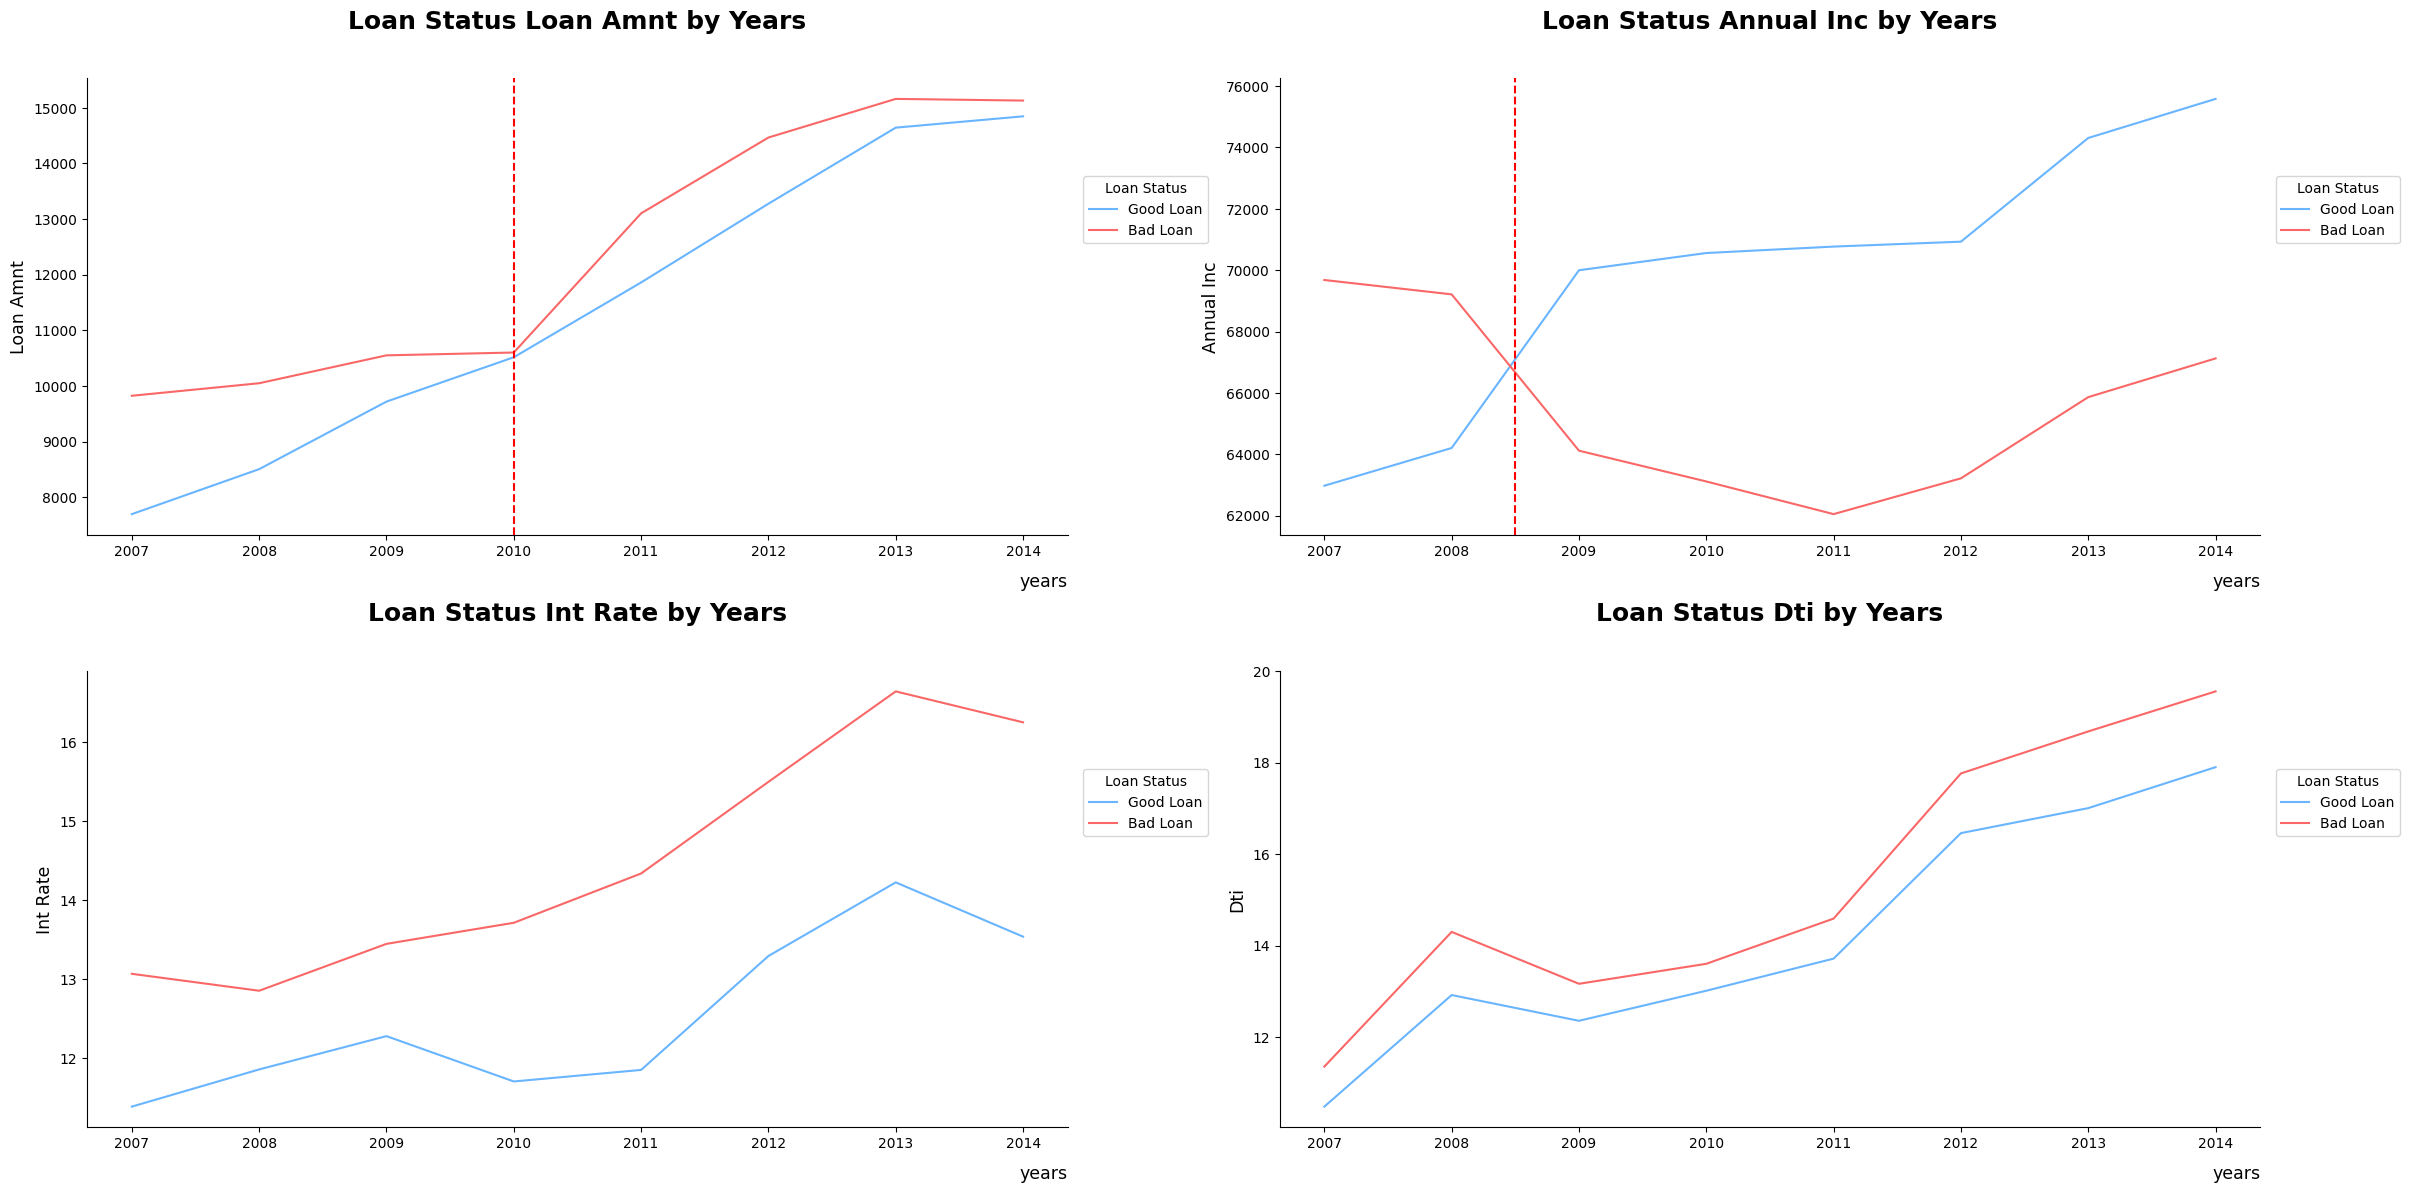

In [15]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 2, 1)
create_lineplot('years', 'loan_amnt', dfloan, hue='loan_status', target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))
plt.axvline(x=2010, color='red', linestyle='--', linewidth=1.5)

plt.subplot(2, 2, 2)
create_lineplot('years', 'annual_inc', dfloan, hue='loan_status', target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))
plt.axvline(x=2008.5, color='red', linestyle='--', linewidth=1.5)

plt.subplot(2, 2, 3)
create_lineplot('years', 'int_rate', dfloan, hue='loan_status', target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))

plt.subplot(2, 2, 4)
create_lineplot('years', 'dti', dfloan, hue='loan_status', target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))

plt.tight_layout()
plt.show()

**Insight🔎** :<br> 

- *Client Loan status' loan amount by Years*
    - The number of loans issued has been increasing over the years
    - Clients with bad loan have more loan amount than clients with good loan, but there's static trend for the bad loan from 2017 to 2010, above 2010 the trend is increasing again til 2014

- *Client Loan status' annual income by Years*
    - Client with good loan have lower income than client with bad loan from 2007 to half 2009, from the half 2009 client with good loan income increase significantly, and the client with bad loan income is gets lower over the years

- *Client Loan status' interest rate by Years*
    - The interest rate for client with bad loan is higher than client with good loan over the years, the trend pattern is almost the same for both client with good and bad loan

- *Client Loan status' loan amount by Years*
    - Debt to Income Ratio for client with bad loan is higher than client with good loan over the years, the trend pattern is almost the same for both client with good and bad loan



### US Region Analysis

In [16]:
dfloan.addr_state.value_counts().index

Index(['CA', 'NY', 'TX', 'FL', 'IL', 'NJ', 'PA', 'OH', 'GA', 'VA', 'NC', 'MI',
       'MA', 'MD', 'AZ', 'WA', 'CO', 'MN', 'MO', 'CT', 'IN', 'NV', 'TN', 'OR',
       'WI', 'AL', 'SC', 'LA', 'KY', 'KS', 'OK', 'AR', 'UT', 'NM', 'HI', 'WV',
       'NH', 'RI', 'DC', 'MT', 'DE', 'AK', 'MS', 'WY', 'SD', 'VT', 'IA', 'NE',
       'ID', 'ME'],
      dtype='object', name='addr_state')

Seems all the address state in this data is in US, example:
- CA -> California 
- NY -> New York
- TX -> Texas
- FL -> Florida
- IL -> Illinois
- etc.<br>

from this i can find insight on the top 10 state that have the most loan application later, but for now i wanted to analyze from the US Region first before dive onto the US address state, to do that we have to bin the address state based on the US States Regions Map from [National Geographic](https://education.nationalgeographic.org/resource/united-states-regions/) 

In [17]:
# Define a list of state abbreviations that belong to the West region
West = [
    'CA',  # California
    'NV',  # Nevada
    'UT',  # Utah
    'CO',  # Colorado
    'WY',  # Wyoming
    'MT',  # Montana
    'ID',  # Idaho
    'OR',  # Oregon
    'WA',  # Washington
    'AK',  # Alaska
    'HI'   # Hawaii
]

# Define a list of state abbreviations that belong to the Southwest region
Southwest = [
    'AZ',  # Arizona
    'NM',  # New Mexico
    'TX',  # Texas
    'OK'   # Oklahoma
]

# Define a list of state abbreviations that belong to the Midwest region
Midwest = [
    'ND',  # North Dakota
    'MN',  # Minnesota
    'SD',  # South Dakota
    'NE',  # Nebraska
    'KS',  # Kansas
    'MO',  # Missouri
    'IA',  # Iowa
    'WI',  # Wisconsin
    'IL',  # Illinois
    'IN',  # Indiana
    'OH',  # Ohio
    'MI'   # Michigan
]

# Define a list of state abbreviations that belong to the Southeast region
Southeast = [
    'AR',  # Arkansas
    'LA',  # Louisiana
    'MS',  # Mississippi
    'AL',  # Alabama
    'GA',  # Georgia
    'TN',  # Tennessee
    'KY',  # Kentucky
    'NC',  # North Carolina
    'SC',  # South Carolina
    'WV',  # West Virginia
    'DC',  # District of Columbia
    'VA',  # Virginia
    'DE',  # Delaware
    'FL'   # Florida
]

# Define a list of state abbreviations that belong to the Northeast region
Northeast = [
    'PA',  # Pennsylvania
    'MD',  # Maryland
    'NJ',  # New Jersey
    'NY',  # New York
    'CT',  # Connecticut
    'RI',  # Rhode Island
    'MA',  # Massachusetts
    'NH',  # New Hampshire
    'VT',  # Vermont
    'ME'   # Maine
]

def us_region(state):
    """
    Function to map US state to its corresponding region.

    Parameters:
    state (str): The US state abbreviation.

    Returns:
    str: The region where the state is located.
    """
    # Check if the state is in the West region
    if state in West:
        return 'West'
    # Check if the state is in the Southwest region
    elif state in Southwest:
        return 'Southwest'
    # Check if the state is in the Midwest region
    elif state in Midwest:
        return 'Midwest'
    # Check if the state is in the Southeast region
    elif state in Southeast:
        return 'Southeast'
    # Check if the state is in the Northeast region
    elif state in Northeast:
        return 'Northeast'
    # If the state is not in any of the defined regions, return 'Other'
    else:
        return 'Other'

# Apply the function us_region to 'addr_state' column
# This will create a new column 'region' in the dataframe dfloan
dfloan['region'] = dfloan['addr_state'].apply(us_region)

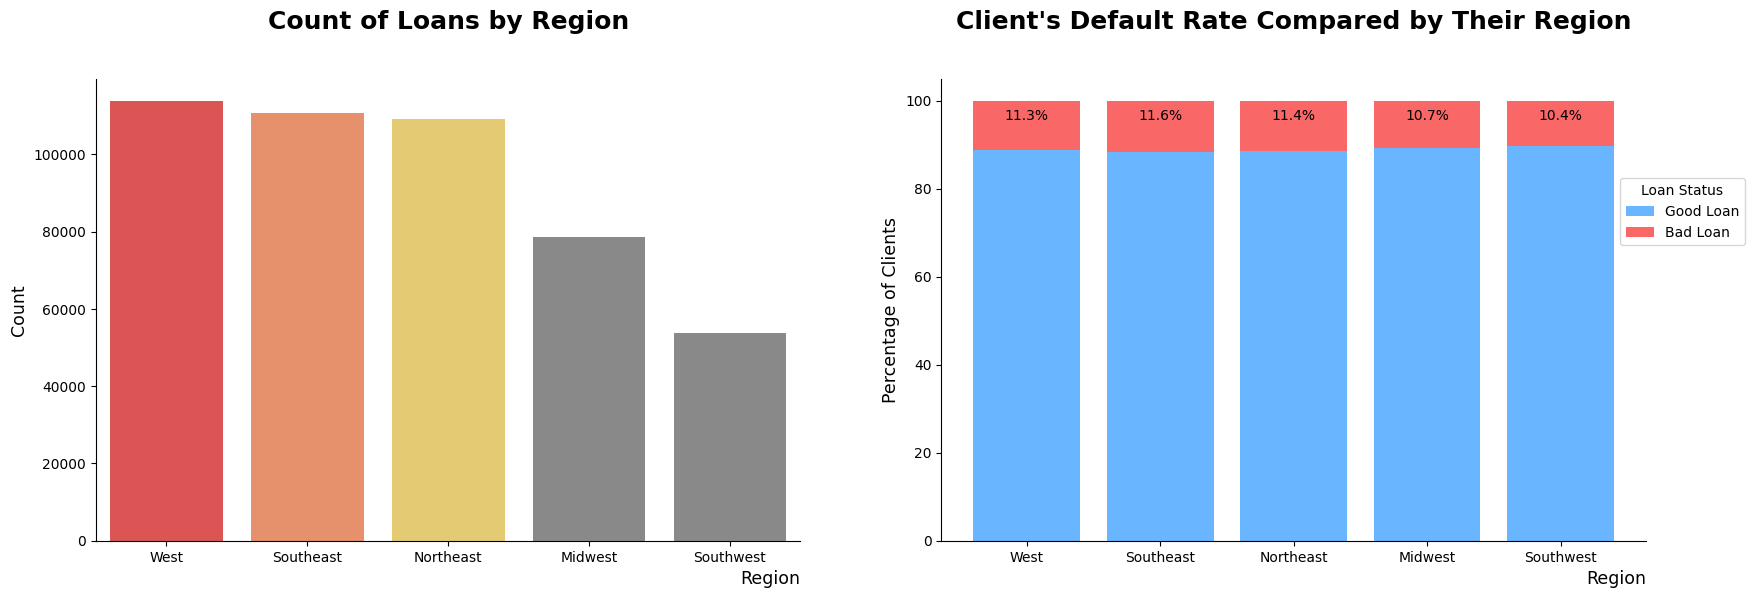

In [80]:
region_order = dfloan.region.value_counts().index
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
pregion = ['#F13F3F', '#FA8958', '#F7D560'] + ['#898989'] * 2
create_countplot('region', dfloan, order=region_order, palette=pregion)


plt.subplot(1, 2, 2)
create_stacked_barchart(dfloan, 'region', 'loan_status', order=region_order, target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))

**Insight🔎** :<br> 
- From the US Region Analysis, we can see that the top 3 most loan application is from the West, Southeast, and Northeast Region without no significant difference between them, and the least loan application is from the Southwest Region.

- The default rate between the regions is not significant, but the Southeast Region has the highest default rate compared to the other regions.

- Because of this we need to deep dive into the US Address State to find more insight on the loan application and default rate, and give business recommendation based on the insight.



### US address State analysis

In [8]:
# Count the number of clients in each state
state_counts = dfloan['addr_state'].value_counts()

# Create a data frame with state abbreviations and counts
df_state_counts = pd.DataFrame({'state': state_counts.index, 'count': state_counts.values})

# Create a choropleth map using plotly
fig = go.Figure(data=go.Choropleth(
    locations=df_state_counts['state'], # State abbreviations
    z = df_state_counts['count'].astype(float), # Number of clients in each state
    locationmode = 'USA-states', # Set of locations match entries in `locations`
    colorscale = 'YlGnBu', # Color scale for the choropleth map
    colorbar_title = "Clients count", # Title for the color bar
))

# Update the layout of the figure
fig.update_layout(
    title={
        'text': "Count of loans by state", # Title of the figure
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=20,
            color="black"
        )
    },
    geo_scope='usa', # Limit map scope to USA
    width=1112, # Width of the figure
    height=600 # Height of the figure
)

# Display the figure
fig.show()

# Calculate the number of defaults for each state
defaults = dfloan[dfloan['loan_status'] == 'Bad Loan']['addr_state'].value_counts()

# Calculate the default rate for each state
default_rate = (defaults / state_counts).fillna(0)

# Create a data frame with state abbreviations and default rates
df_state_default_rate = pd.DataFrame({'state': default_rate.index, 'default_rate': default_rate.values})

# Create a choropleth map using plotly
fig = go.Figure(data=go.Choropleth(
    locations=df_state_default_rate['state'], # State abbreviations
    z = df_state_default_rate['default_rate'].astype(float), # Default rate in each state
    locationmode = 'USA-states', # Set of locations match entries in `locations`
    colorscale = 'YlOrRd', # Color scale for the choropleth map
    colorbar_title = "Default rate", # Title for the color bar
))

# Update the layout of the figure
fig.update_layout(
    title={
        'text': "Default rate of loans by state", # Title of the figure
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=20,
            color="black"
        )
    },
    geo_scope='usa', # Limit map scope to USA
    width=1112, # Width of the figure
    height=600 # Height of the figure
)

# Display the figure
fig.show()

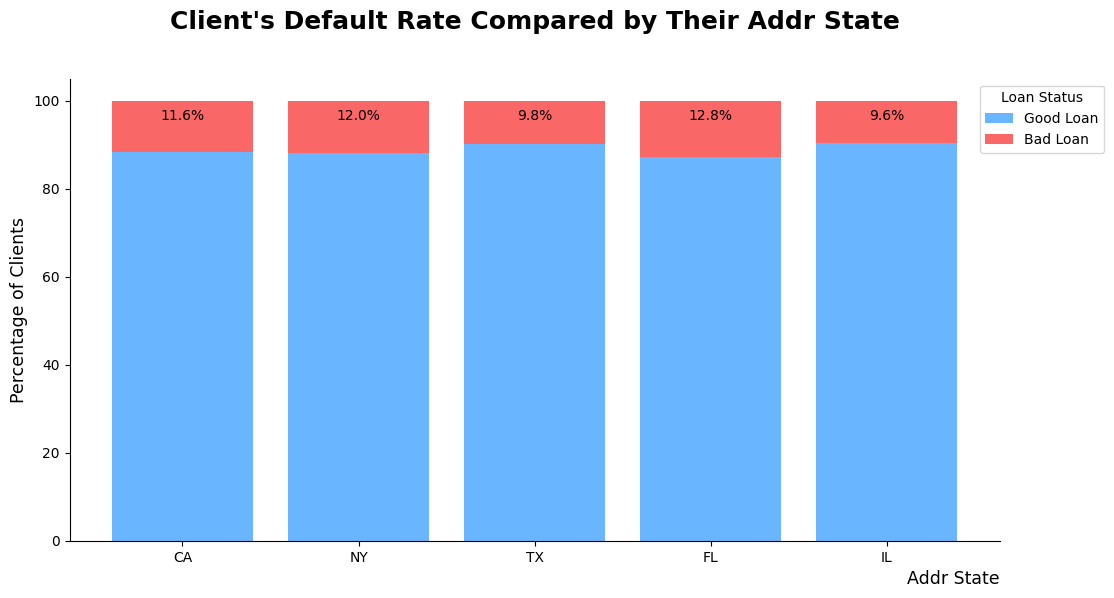

In [9]:
# Create a stacked barchart of loan statuses for the top 5 states to see the default rate
# Get the top 5 states by loan count
top_states = dfloan.addr_state.value_counts().head(5).index

# Filter the dataframe to only include the top 5 states
dfloan_top_states = dfloan[dfloan.addr_state.isin(top_states)]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a stacked bar plot using the function `create_stacked_barchart`
create_stacked_barchart(dfloan_top_states, 'addr_state', 'loan_status', top_states, target_colors, (1.12, 1))

**Insight🔎** :<br> 
- Our top 1 clients are from California(CA), around 70000 of our clients are from California with 11.6% default rate, 
- The second top clients are from New York(NY), with 12.1% default rate,
- But in Texas(TX) the default rate is smaller than the first two, with 9.8% default rate,
- Lastly the highest default rate from this top 5 state is Florida (FL) with 12.8% default rate.
<br><br>

**Recommendation🌟** :<br>
Focusing our loan efforts on clients in Texas (TX) while maintaining a close eye on default rates in other states.<br>

By prioritizing loan applications from Texas, we can potentially increase our approval rate and reduce the risk of defaults.
<br>
However, it's important to  monitor default rates across all states,  including California and New York,  because these states still represent a significant portion of our clients.
<br>

Here are some additional factors to consider:

- Loan delinquency rates: Track not only defaults but also delinquencies (late payments) in different states. This can give us early warning signs of potential defaults.
- Industry trends: Research loan performance across different industries in Texas. There might be specific sectors with a higher risk of defaults.
- Client profile: Analyze the creditworthiness of borrowers beyond just their location. This includes factors like credit score, income stability, and debt-to-income ratio.


### Client's Grade Loan Status Analysis

In [10]:
dfloan.grade.value_counts().index

Index(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype='object', name='grade')

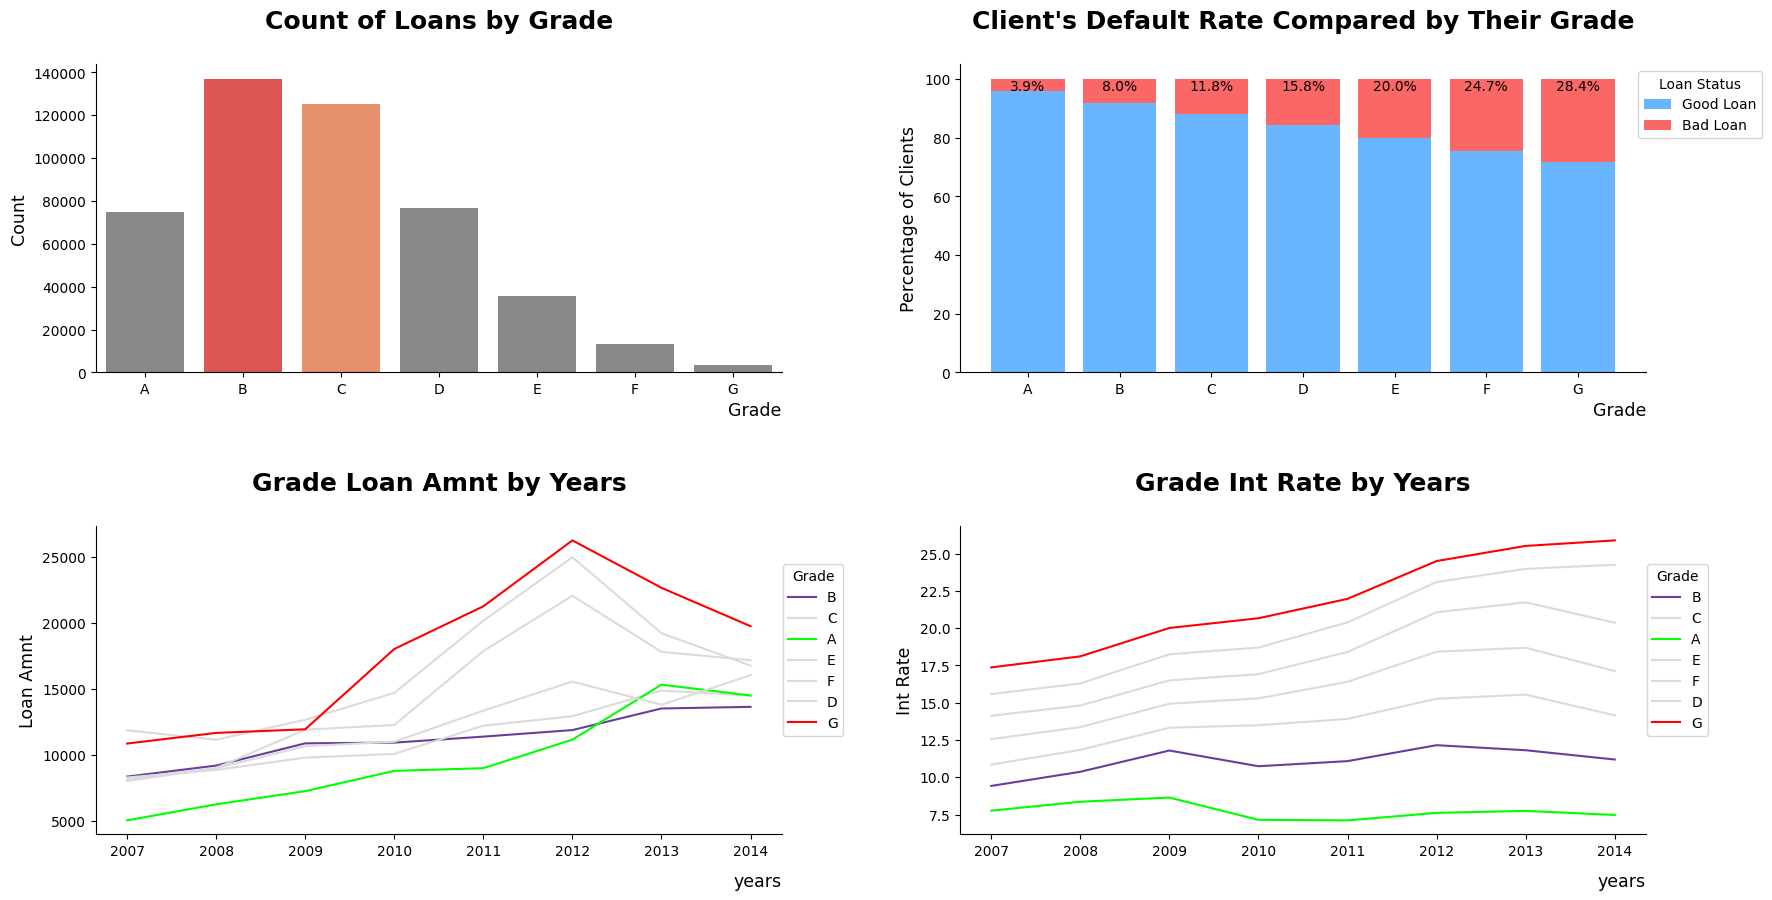

In [75]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create the first subplot
plt.subplot(2, 2, 1)

# Define the order of the grades and the colors for the bars
order_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grade_colors = ['#898989'] + ['#F13F3F', '#FA8958'] + ['#898989'] * 5

# Create a countplot with defied function
create_countplot('grade', dfloan, order=order_grade, palette=grade_colors)

# Create the second subplot
plt.subplot(2, 2, 2)
# Call the function to create a stacked bar chart
create_stacked_barchart(dfloan, 'grade', 'loan_status', order_grade, target_colors, bbox_to_anchor=(1.18, 1))

# Create the third subplot
plt.subplot(2, 2, 3)
grade_color = {
    'A': '#00FF00',
    'B': '#6a3d9a',
    'C': '#DBDBDB',
    'D': '#DBDBDB',
    'E': '#DBDBDB',
    'F': '#DBDBDB',
    'G': '#FF0000'
}

create_lineplot('years', 'loan_amnt', dfloan, 'grade', target_colors=grade_color, bbox_to_anchor=(1.1, 0.9))

# Create the fourth subplot
plt.subplot(2, 2, 4)
create_lineplot('years', 'int_rate', dfloan, 'grade', target_colors=grade_color, bbox_to_anchor=(1.1, 0.9))

plt.subplots_adjust(hspace=0.5, wspace=0.26)
# Adjust the layout of the plots
# plt.tight_layout()

# Display the plots
plt.show()

**Insight🔎** :<br>
- Our clients Loan grade are mostly in B and C grade.

- From the stacked barchart we can see that, the lower the grade the clients have, the higher the default rate.

- The lowest default rate is in Client with A grade loan, with 3.9% default rate.

- The highest default rate is in Client with G grade loan, with 28.4% default rate, and also this grade have the highest loan amount & interest rate.
<br>

**Recommendation🌟** :<br>
- Focus loan efforts on clients with higher loan grades (A, B, C). Since these grades have demonstrably lower default rates, targeting them can help mitigate risk.

- Implement stricter criteria for lower loan grades (D, E, F, G). This could involve stricter requirements for approval, such as higher credit score requirements or smaller loan amounts. You may also consider charging a higher interest rate for these loans to reflect the increased risk.

- Evaluate the possibility of loan restructuring for existing lower-grade loans. This could involve extending the loan term or lowering the interest rate to make it more manageable for the borrower and reduce the risk of default.


### Client's Employment Length Analysis

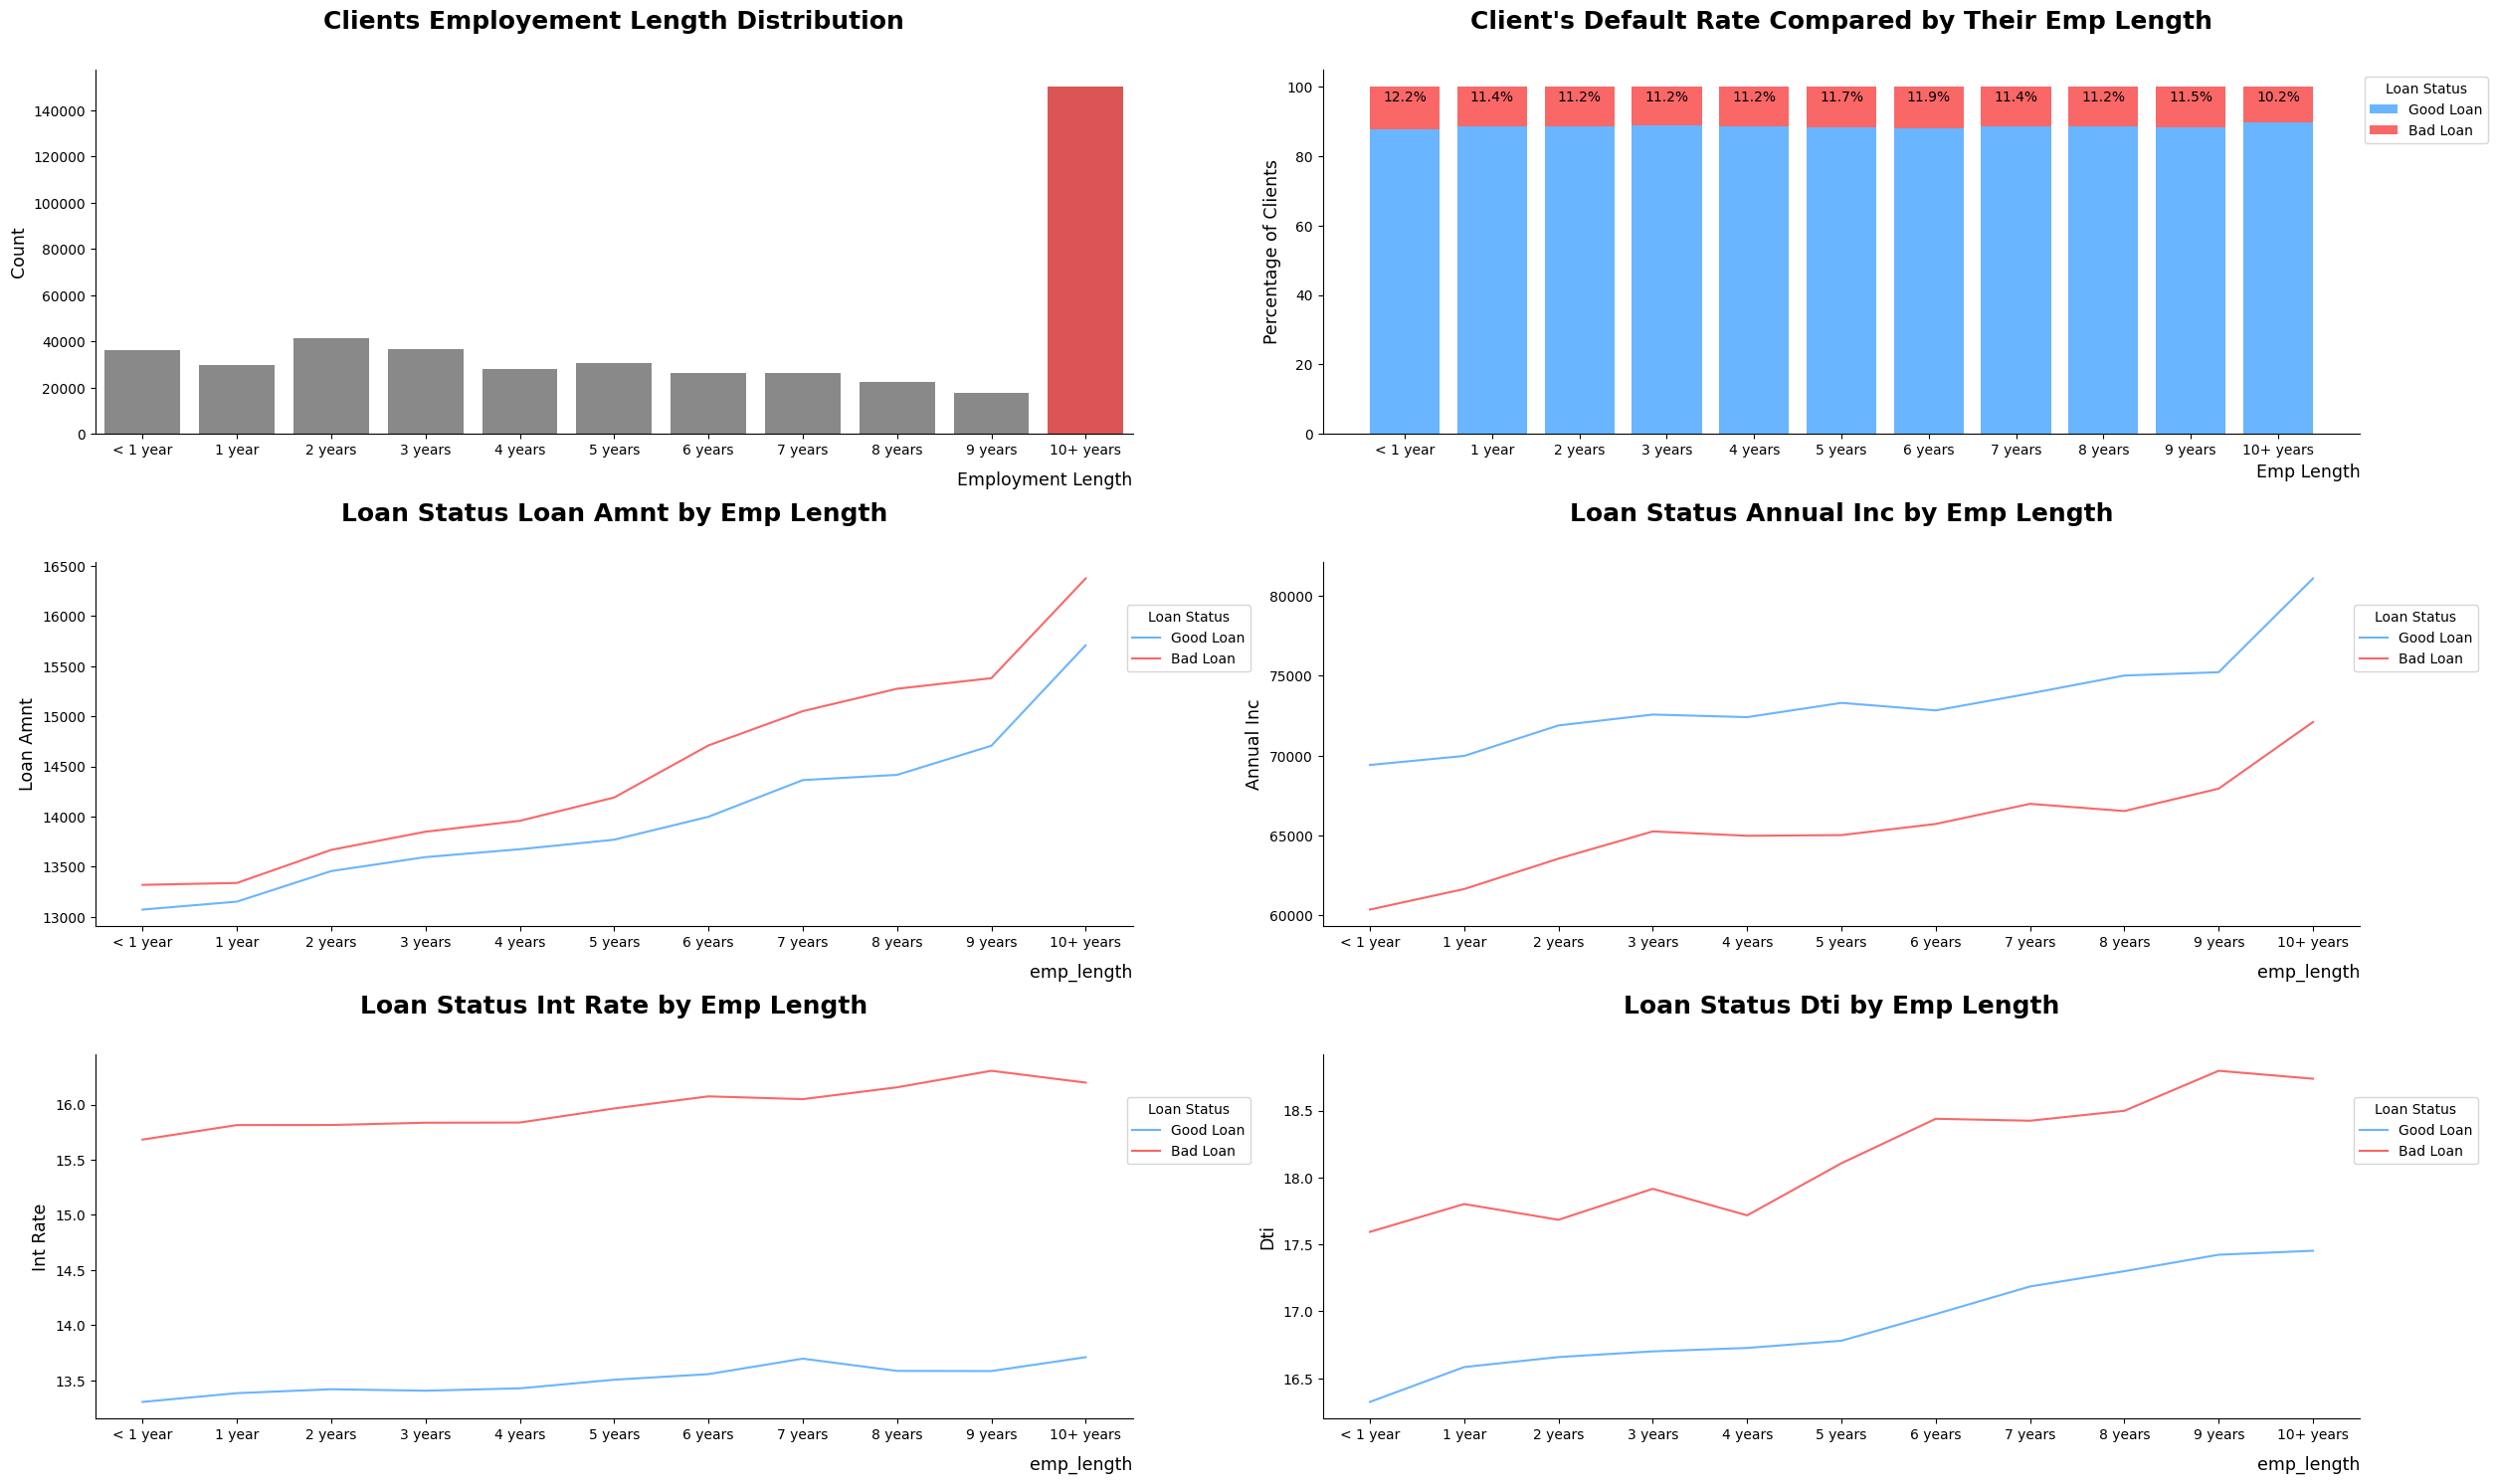

In [12]:
# Set the figure size
plt.figure(figsize=(25, 15))

# Define the order
length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

# Convert the 'emp_length' column to a categorical type with the specified order
dfloan['emp_length'] = pd.Categorical(dfloan['emp_length'], categories=length_order, ordered=True)

plt.subplot(3, 2, 1)
order_emp = dfloan.emp_length.value_counts().index
palette_length = ['#898989'] * 10 + ['#F13F3F']
sns.countplot(x='emp_length', data=dfloan, order=length_order, palette=palette_length)
plt.title('Clients Employement Length Distribution', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Employment Length', fontsize=12.5, loc='right', labelpad=10)
plt.ylabel('Count', fontsize=12.5)


plt.subplot(3, 2, 2)
create_stacked_barchart(dfloan, 'emp_length', 'loan_status', length_order, target_colors, bbox_to_anchor=(1.13, 1))

plt.subplot(3, 2, 3)
create_lineplot('emp_length', 'loan_amnt', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 4)
create_lineplot('emp_length', 'annual_inc', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 5)
create_lineplot('emp_length', 'int_rate', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 6)
create_lineplot('emp_length', 'dti', dfloan, 'loan_status', target_colors, (1.12, 0.9))
 
plt.tight_layout()
plt.show()

**Insight🔎** :<br>
- Most of our clients are employed for more than 10 years, with 10.2% default rate.

- From the lineplot we can see the more the clients employed, the higher the loan amount they have, from that we can see that the Client with bad loan have higher loan amnt than the good clients,

- the clients with good loan by the time they employed, they still have a higher annual income than the bad clients.

- By the time the client employed for 10 years, the good loan clients have a lower interest rate than the bad loan clients.

- and also the good loan clients have lower debt to income ratio than the bad loan clients.
<br>

**Recommendation🌟** :<br>
- Risk-Based Lending with Employment Tenure:
    - Leverage employment tenure as a factor, but prioritize other indicators of creditworthiness. While long employment history (over 10 years with a 10.2% default rate) suggests potential for managing larger loans, it's not the sole indicator of responsible borrowing.

    - Implement a tiered loan structure that considers not just employment tenure, but also debt-to-income ratio, credit score, and loan amount. This allows you to offer:
    
         - Competitive rates and loan terms to low-risk borrowers with long employment history, good credit, and manageable debt.

         - Higher interest rates, stricter terms, or lower maximum loan amounts for higher-risk borrowers (shorter employment tenure, higher debt-to-income ratio, or lower credit score).

- Targeted Marketing and Loan Products:
    - Develop targeted marketing campaigns for clients with long employment history and good creditworthiness. Highlight loan programs with larger limits, potentially lower interest rates, and benefits that appeal to this demographic (e.g., debt consolidation loans for long-term employees).
    - Consider offering loan products specifically tailored for long-term employees who may have lower credit scores. These products could have features like lower loan maximums but with a path to better rates or higher limits upon improvement in credit score.

<!-- - Focus on clients with longer employment lengths. These clients have a lower default rate and are more likely to have a stable income.
- Consider offering loan programs with higher limits for clients with a long employment history (over 10 years). These clients have a lower default rate (10.2% in our data) and can likely manage larger loans.
- Develop a risk-based assessment system that considers both loan amount and employment history. This will allow us to tailor loan offers to each client's specific situation. For example, you might approve a larger loan amount for a long-term employed borrower with a good credit history, even if their loan grade is lower (B or C). -->

### Deepen the causation of higher loan Amouns for bad clients from the Loan purpose and Home ownership

#### Loan Purpose Analysis

In [11]:
# categoric.sample(5)
dfloan.purpose.value_counts()

purpose
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: count, dtype: int64

Because the loan purpose column contains too many unique values that the values proportions are too small, i only take the top 5 loan purpose for the analysis. and for further binning i will make 4 bins for the loan purpose.

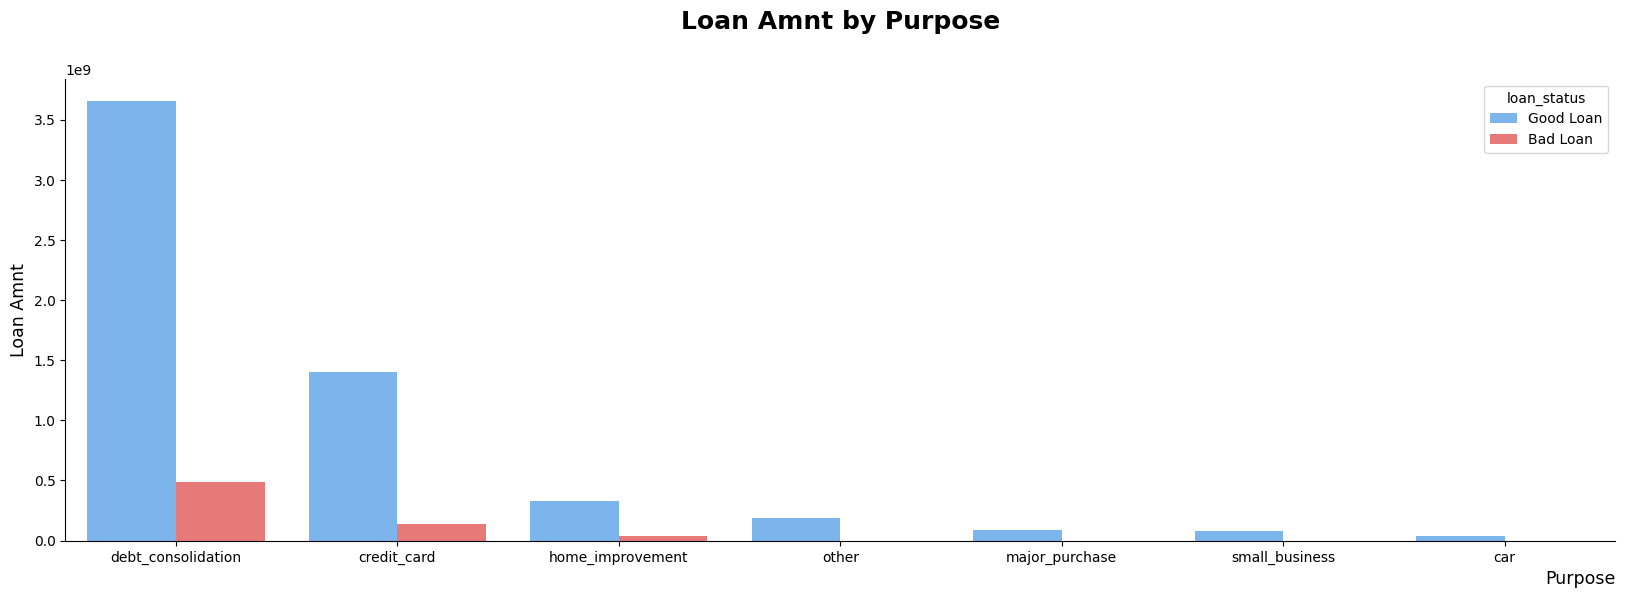

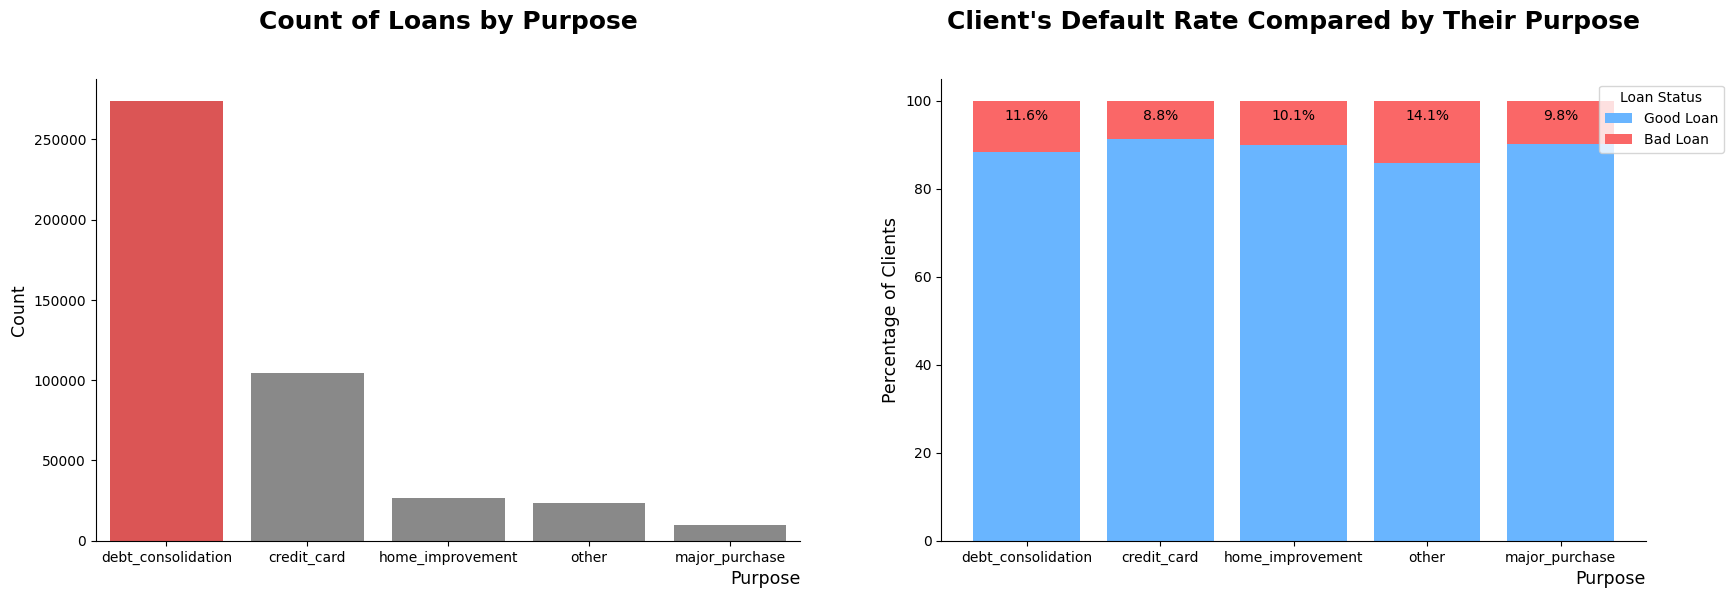

In [45]:
# Get the top 5 purposes by loan count
top_values = dfloan.purpose.value_counts().head(5).index

# FIlet the dataframe to only include the top 5 purposes
top_purpose = dfloan[dfloan.purpose.isin(top_values)]

# define order of the top purposes
order_purp = top_purpose.purpose.value_counts().index

# palette for countplot top purposes highlight
palette_purpose = ['#F13F3F'] + ['#898989'] * 4

# palette for barplot
custpal = ["#1abc9c", "#e67e22", "#f1c40f", "#8e44ad", "#2c3e50", "#27ae60"]

# Set the figure size
plt.figure(figsize=(20, 6))

grp = dfloan.groupby(['purpose', 'loan_status'])['loan_amnt'].sum().reset_index().sort_values(by='loan_amnt', ascending=False)
tophead = grp.head(10)

create_barplot('purpose', 'loan_amnt', tophead, hue='loan_status', palette=target_colors)

# Set the figure size
plt.figure(figsize=(20, 6))

# Creating a subplot for the countplot of loan purposes
# This plot will show the count of loans for each purpose, differentiated by loan status
plt.subplot(1, 2, 1)
create_countplot('purpose', top_purpose, order=order_purp, palette=palette_purpose)

# Creating a subplot for the stacked bar chart of loan purposes
# This plot will show the proportion of each loan status for each loan purpose
plt.subplot(1, 2, 2)
create_stacked_barchart(top_purpose, 'purpose', 'loan_status', order_purp, target_colors, bbox_to_anchor=(1.12, 1))

**Insight🔎** :<br>
- The top 5 loan purpose are Debt consolidation, Credit card, Home improvement, other, and Major purchase.
- Debt consolidation is the most loan purpose with 11.6% default rate.
- Credit Card is the second most loan purpose with slightly lower default rate than Debt consolidation(8.8%).
- Other loan purpose have the highest default rate with 14.1% default rate.

**Recommendation🌟** :<br>
- Target Debt Consolidation and Credit Card Loans with Strategic Refinements:

    - Focus on debt consolidation and credit card loans while strategically managing credit risk. While debt consolidation has a slightly higher default rate (11.6%) than credit cards (8.8%), they both represent opportunities for customer acquisition and potentially higher loan amounts.

- Debt Consolidation Strategy:

    - Develop a competitive debt consolidation loan product with features that attract borrowers, such as:
        - Interest rates that are lower than the average credit card interest rate in your market.
        - Streamlined application process to make it easy for borrowers to consolidate their debt.
        - Flexible loan terms that allow borrowers to choose a repayment plan that fits their budget.

- Credit Card Refinance Strategy:

    - Offer a credit card refinance loan with features that incentivize borrowers to switch from credit cards to your loan, such as:
        - A fixed interest rate that is lower than the borrower's current credit card interest rate.
        - Potential rewards program for on-time payments.
        - Mobile app or online portal for convenient loan management.

#### Home Ownership Analysis

posx and posy should be finite values
posx and posy should be finite values


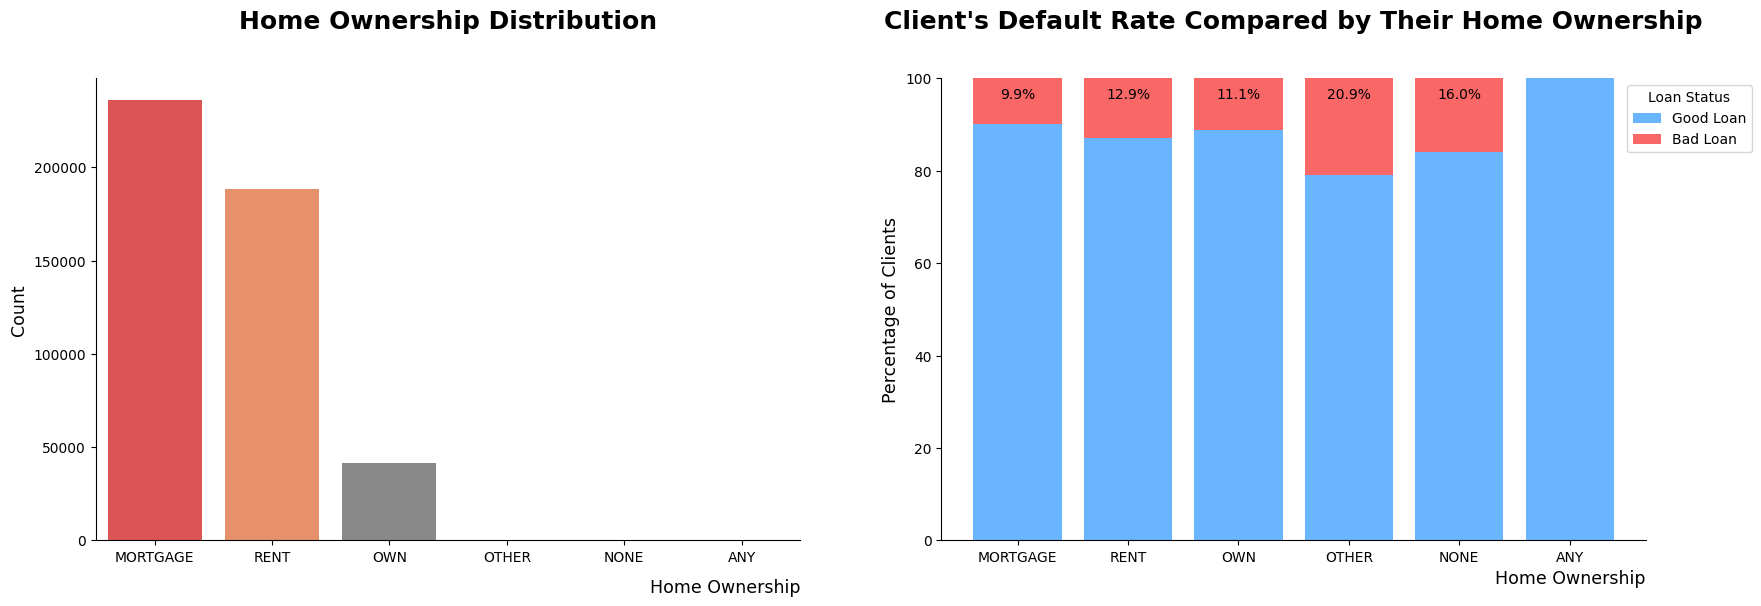

In [229]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
home_order = dfloan.home_ownership.value_counts().index
phome = ['#F13F3F', '#FA8958'] + ['#898989'] * 4
sns.countplot(x='home_ownership', data=dfloan, palette=phome, order=home_order)
plt.title('Home Ownership Distribution', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Home Ownership', fontsize=12.5, loc='right', labelpad=10)
plt.ylabel('Count', fontsize=12.5)
sns.despine()

plt.subplot(1, 2, 2)

create_stacked_barchart(dfloan, 'home_ownership', 'loan_status', home_order, target_colors, bbox_to_anchor=(1.16, 1))

plt.show()

**Insight🔎** :<br>
- Most of our clients home ownership status is Mortgage, with 9.9% default rate(this is the lowest default rate between all the values).
- the second most home ownership status is Rent, with 12.1% default rate.
- There's few of our clients that applied for loan with home ownership status if 'Own' (less than 50000 clients), with 11.1% default rate, slightly lower than Rent.
- Home status ownership with 'Other' have the highest default rate with 20.9% default rate, but the number of clients with this status is very small.

**Recommendation🌟** :<br>
- Prioritize Mortgage Holders and Target Renters with Caution:
    - Focus loan efforts on clients with a mortgage (9.9% default rate). This group has the demonstrably lowest default rate, suggesting a more stable financial situation and potentially lower risk.

    - Develop targeted marketing campaigns for renters (12.1% default rate). Highlight the benefits of our loan products, but ensure clear communication of eligibility requirements and responsible borrowing practices.

- Consider Offering Incentives for Owning Property:
    - Explore offering slightly lower interest rates or more favorable loan terms for clients who own their home ("Own" status, 11.1% default rate). Owning property suggests a level of financial commitment that could translate to responsible loan repayment.

- Limited Action on "Other" Category:
    - Due to the small client base for the "Other" homeownership status (20.9% default rate), a data-driven recommendation is difficult. Consider:
        - Investigating the reasons behind the high default rate. This could inform future decisions about including this category in our loan offerings.
        - Potentially excluding the "Other" category from our loan programs if the risk is deemed too high.


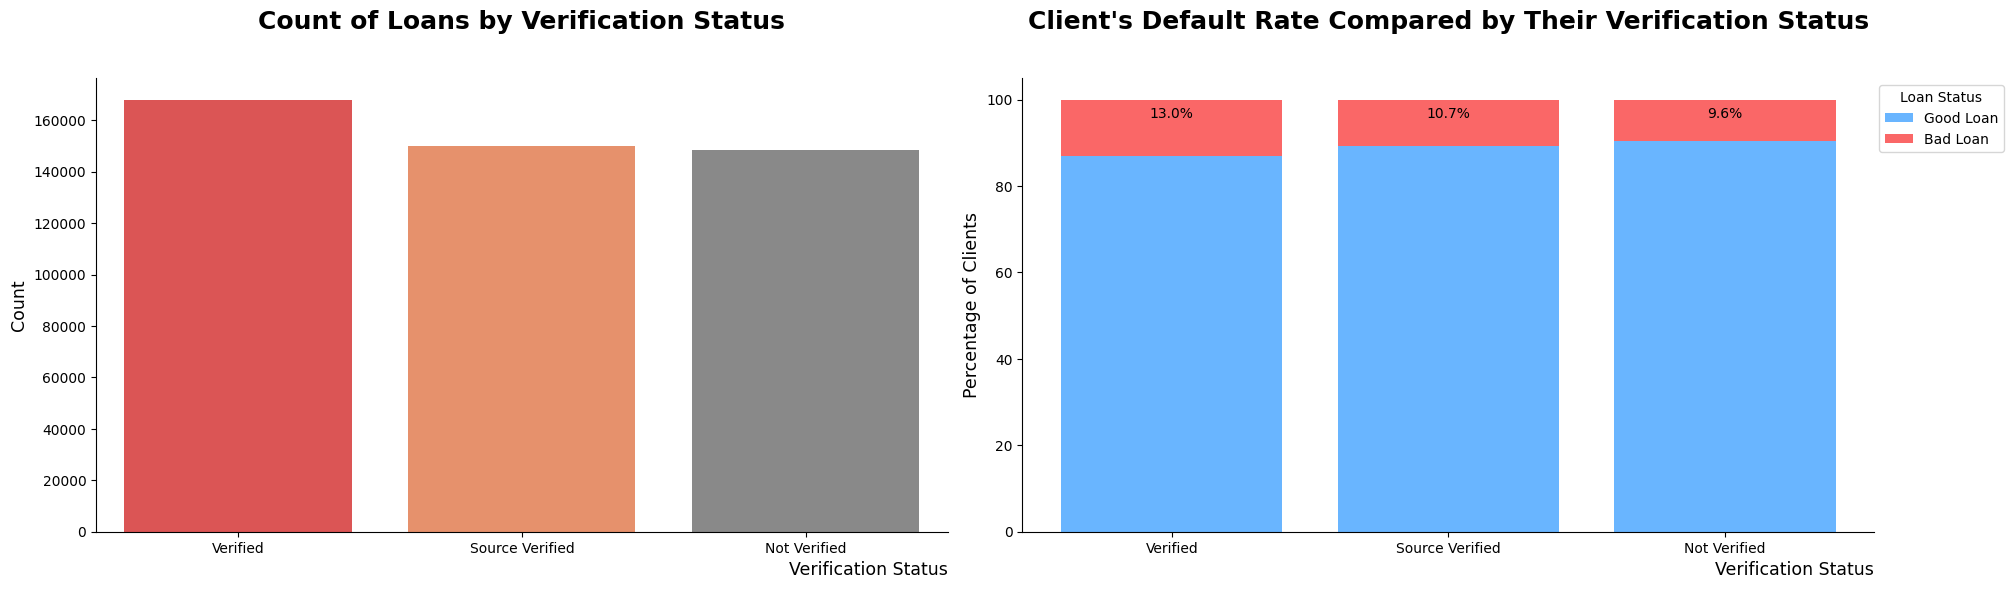

In [237]:
verification_order = dfloan.verification_status.value_counts().index
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
create_countplot('verification_status', dfloan, order=verification_order, palette=phome)

plt.subplot(1, 2, 2)
create_stacked_barchart(dfloan, 'verification_status', 'loan_status', dfloan.verification_status.value_counts().index, target_colors, bbox_to_anchor=(1.16, 1))

sns.despine()
plt.tight_layout()
plt.show()

**Insight🔎** :<br>
- This data insight about loan default rates and client verification status is counterintuitive
- Clients verification statuses verified, source verified, or not verified the value proportions are almost the same, but the default rate for the verified status is the highest than the other two with 13% default rate, but the not verified status have the lowest default rate with 8.8% default rate.

**Recommendation🌟** :<br>
- Investigate the Cause of the High Default Rate for Verified Clients:
    - The finding that verified clients have the highest default rate (13%) while not-verified clients have the lowest (8.8%) is unexpected. Analyze the data further to understand why this might be happening. Here are some possibilities:
        - Verification Process: Is it possible the verification process itself is flawed, allowing some high-risk borrowers to be categorized as verified?
        - Loan Purpose: Are verified clients applying for riskier loan types with higher default rates overall?
        - Selection Bias: Are there any biases in how clients are selected for verification, potentially leading to a higher risk pool in the verified category?

- Refine Verification Process:
    - Regardless of the cause, it's crucial to ensure your verification process is effective in identifying legitimate borrowers. This may involve:
        - Strengthening verification procedures: Double-check identification documents, income verification, and employment status.
        - Considering alternative verification methods: Explore leveraging new technologies or data sources to improve verification accuracy.

<Axes: >

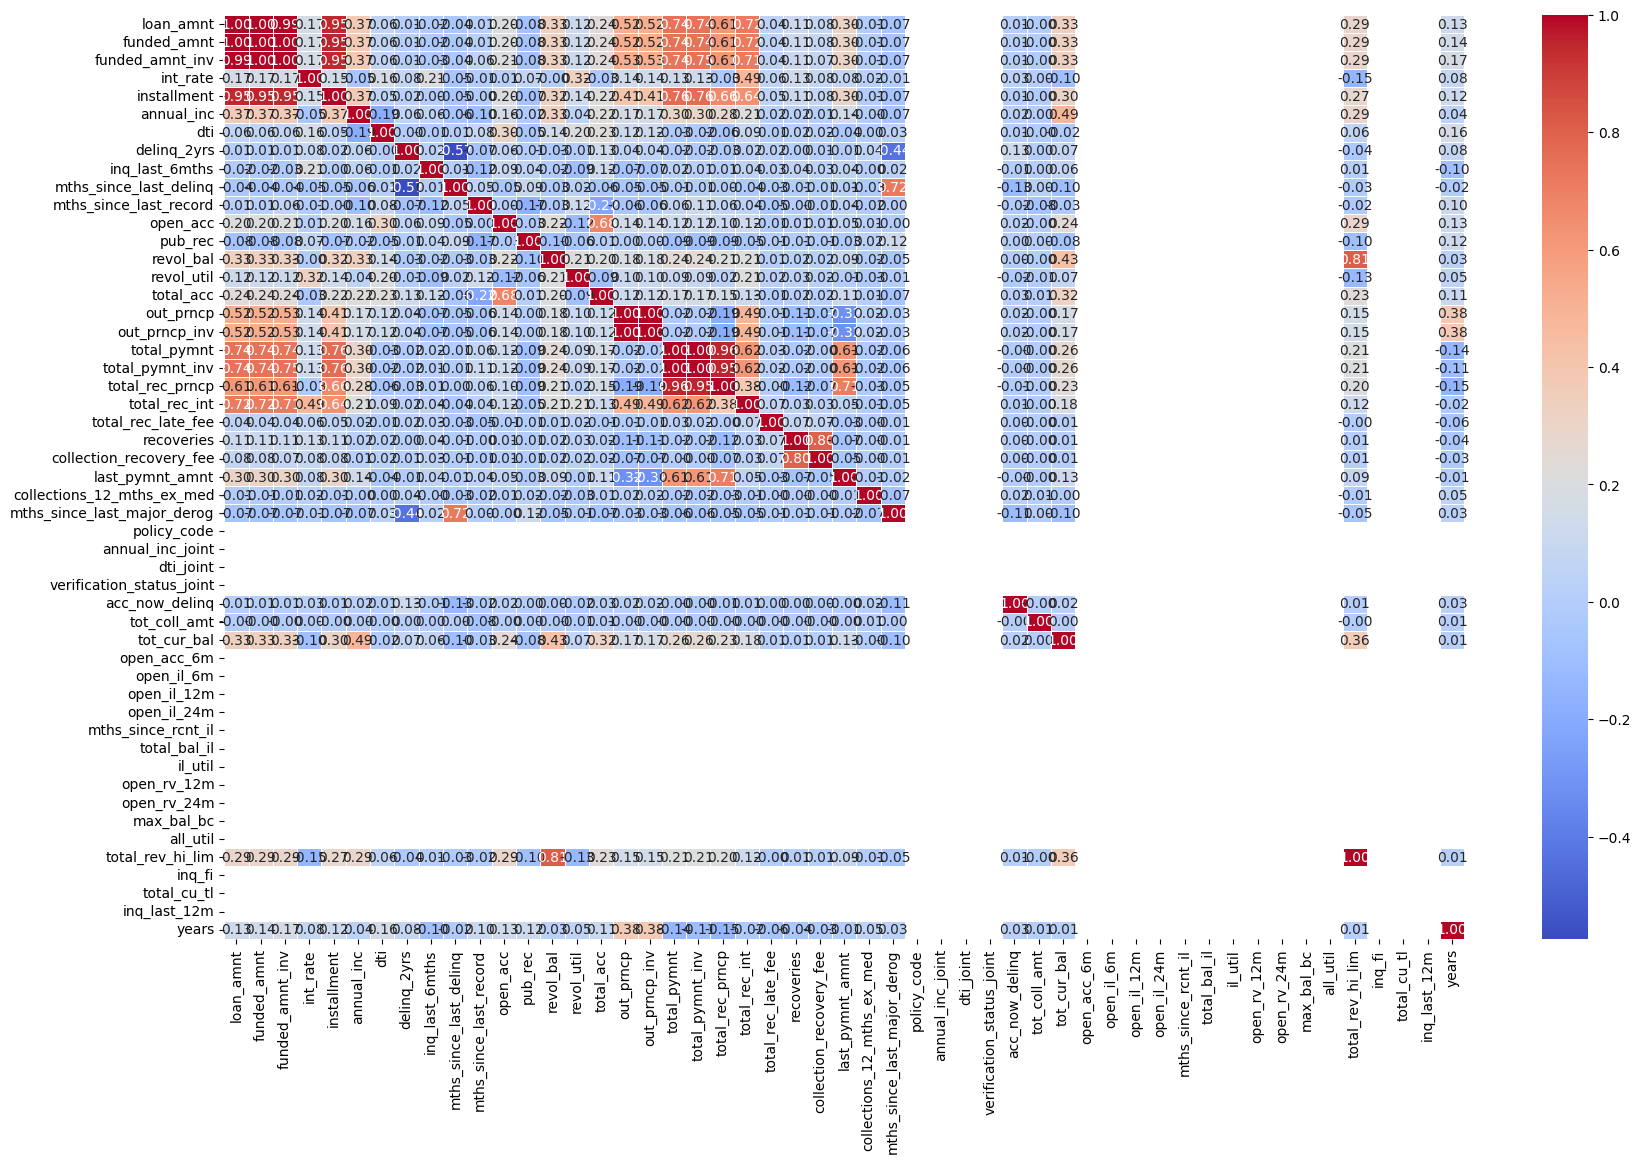

In [9]:
# Select all the numeric data from dfloan and assigne it to nums variable
nums = dfloan.select_dtypes('number')

# Create a correlation matrix of the numeric data
corr = nums.corr()

# Set the figure size
plt.figure(figsize=(20, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


# Auto Processing from the previous EDA 

In [3]:
# Read the CSV file into a DataFrame(dfloan)
dfloan = pd.read_csv('../data/loan_data_2007_2014.csv', low_memory=False)

# Dropping unnecessary columns from the dataframe
dfloan = dfloan.drop(columns=['id', 'member_id', 'Unnamed: 0'], axis=1)

# Define a function to map loan status to 'Good Loan' or 'Bad Loan'
def map_loan_status(status):
    """
    Function to map loan status to 'Bad Loan' or 'Good Loan'.
    
    Parameters:
    status (str): The loan status to be mapped.
    
    Returns:
    str: 'Bad Loan' if the status is in the list of default statuses, 'Good Loan' otherwise.
    """
    
    # List of loan statuses that imply a default
    default_statuses = [
        'Charged Off', 
        'Late (31-120 days)', 
        'Late (16-30 days)',
        'Default',
        'Does not meet the credit policy. Status:Charged Off'
    ]
    
    # Return 'Bad Loan' if the status is in the list of default statuses, 'Good Loan' otherwise
    return 'Bad Loan' if status in default_statuses else 'Good Loan'

# Apply the map_loan_status function to each status in the 'loan_status' column
dfloan['loan_status'] = dfloan['loan_status'].apply(map_loan_status)

# Convert the 'issue_d' column to datetime format with 'Oct-14' style dates
dfloan['issue_d'] = pd.to_datetime(dfloan['issue_d'], format='%b-%y')

# Extract the year from the datetime object ad store it in a new column 'years'
dfloan['years'] = dfloan['issue_d'].dt.year


# Define a list of state abbreviations that belong to the West region
West = [
    'CA',  # California
    'NV',  # Nevada
    'UT',  # Utah
    'CO',  # Colorado
    'WY',  # Wyoming
    'MT',  # Montana
    'ID',  # Idaho
    'OR',  # Oregon
    'WA',  # Washington
    'AK',  # Alaska
    'HI'   # Hawaii
]

# Define a list of state abbreviations that belong to the Southwest region
Southwest = [
    'AZ',  # Arizona
    'NM',  # New Mexico
    'TX',  # Texas
    'OK'   # Oklahoma
]

# Define a list of state abbreviations that belong to the Midwest region
Midwest = [
    'ND',  # North Dakota
    'MN',  # Minnesota
    'SD',  # South Dakota
    'NE',  # Nebraska
    'KS',  # Kansas
    'MO',  # Missouri
    'IA',  # Iowa
    'WI',  # Wisconsin
    'IL',  # Illinois
    'IN',  # Indiana
    'OH',  # Ohio
    'MI'   # Michigan
]

# Define a list of state abbreviations that belong to the Southeast region
Southeast = [
    'AR',  # Arkansas
    'LA',  # Louisiana
    'MS',  # Mississippi
    'AL',  # Alabama
    'GA',  # Georgia
    'TN',  # Tennessee
    'KY',  # Kentucky
    'NC',  # North Carolina
    'SC',  # South Carolina
    'WV',  # West Virginia
    'DC',  # District of Columbia
    'VA',  # Virginia
    'DE',  # Delaware
    'FL'   # Florida
]

# Define a list of state abbreviations that belong to the Northeast region
Northeast = [
    'PA',  # Pennsylvania
    'MD',  # Maryland
    'NJ',  # New Jersey
    'NY',  # New York
    'CT',  # Connecticut
    'RI',  # Rhode Island
    'MA',  # Massachusetts
    'NH',  # New Hampshire
    'VT',  # Vermont
    'ME'   # Maine
]

def us_region(state):
    """
    Function to map US state to its corresponding region.

    Parameters:
    state (str): The US state abbreviation.

    Returns:
    str: The region where the state is located.
    """
    # Check if the state is in the West region
    if state in West:
        return 'West'
    # Check if the state is in the Southwest region
    elif state in Southwest:
        return 'Southwest'
    # Check if the state is in the Midwest region
    elif state in Midwest:
        return 'Midwest'
    # Check if the state is in the Southeast region
    elif state in Southeast:
        return 'Southeast'
    # Check if the state is in the Northeast region
    elif state in Northeast:
        return 'Northeast'
    # If the state is not in any of the defined regions, return 'Other'
    else:
        return 'Other'

# Apply the function us_region to 'addr_state' column
# This will create a new column 'region' in the dataframe dfloan
dfloan['region'] = dfloan['addr_state'].apply(us_region)

## Data Preprocessing
for this Data Preprocessing Step i will drop the columns that has too many unique values and only have 1 value (eg., `url`, `desc`, `title`, `policy` etc.) first as i said before...

Drop columns with high cardinality (too many unique values) or no variance (only one unique value). High cardinality can lead to overfitting in models, while no variance offers no insight. Hence, these columns are removed

from the above categorical columns statistical summary, i found that there's column with too many unique values and there's column with 1 unique value, for 
findings : 
- Columns to drop:
    - `url` column contains too many unique values, and we will drop them later
    - `desc` column contains too many unique values, and we will drop them later
    - `title` column contains too many unique values, and we will drop them later
    - `pymnt_plan` column is a binary column and it's very imbalanced, n: 99.9% and y: 0.00005%, we will drop this column later
    - `application_type` column only have 1 unique value, the data values don't have any variance, we will drop this column later
    - `zip_code` column contains too many unique values, and we will drop them later and i don't think it's important for our analysis
    - `policy_code` column only have 1 unique value, the data values don't have any variance, we will drop this column later
    - `acc_now_delinq` column is a categorical column with value range from 0 - 5 and it's very imbalanced, 0: 99.9%, because of the 0 values is too much this coluumn considered only have 1 unique value, we will drop this column later

- Columns to bin :
    - `addr_state` i'm about to generalize this column to region, so i will keep this column for now

### Drop Uneccessary Columns

In [51]:
dfloan.sample(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
225830,225830,1149267,1390223,27500,27500,27470.49032,60 months,23.33,780.47,F,F5,Honeywell,10+ years,MORTGAGE,110000.0,Verified,Feb-12,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt Consolidation,130xx,NY,13.67,0.0,Mar-98,0.0,26.0,NaN,11.0,0.0,17765,77.2,30.0,f,9528.42,9519.71,35792.18000,35745.59,17971.59,17820.59,0.0,0.0,0.0,Dec-15,780.47,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167944,167944,3294568,4066720,10000,10000,10000.00000,36 months,15.80,350.59,C,C3,Air Force Reserves,6 years,RENT,30000.0,Not Verified,Feb-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit Card Money,919xx,CA,11.92,0.0,Jul-95,0.0,NaN,NaN,7.0,0.0,12749,50.4,12.0,f,0.00,0.00,11610.22428,11610.22,10000.00,1610.22,0.0,0.0,0.0,Jan-15,252.91,NaN,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,12749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25300.0,NaN,NaN,NaN
112583,112583,6318164,7849702,19000,19000,19000.00000,60 months,15.88,460.84,C,C4,Chilton County Board of Education,10+ years,MORTGAGE,45000.0,Verified,Jul-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,350xx,AL,19.41,1.0,Jul-95,0.0,11.0,NaN,13.0,0.0,6368,22.9,32.0,f,11655.82,11655.82,13364.30000,13364.30,7344.18,6020.12,0.0,0.0,0.0,Jan-16,460.84,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,141295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27800.0,NaN,NaN,NaN


In [10]:
not_necessary_col = ['url', 'desc', 'title', 'pymnt_plan', 'application_type', 'zip_code', 'addr_state', 'policy_code', 'acc_now_delinq', 'sub_grade']
dfloan_cleaned1 = dfloan.drop(columns=not_necessary_col, axis=1)

### Drop Columns with High Missing Values

In [11]:
def dropnan(data, threshold):
    """
    Function to drop columns with missing values above a certain threshold.
    
    Parameters:
    data (DataFrame): The data to be cleaned.
    threshold (float): The threshold proportion of missing values, columns above threshold which will be dropped.
    
    Returns:
    DataFrame: The cleaned data with columns dropped based on the threshold.

    Examples:
    >>> dropnan(data, 0.5)
    """

    # Iterate over each column in the DataFrame
    for column in data.columns:
        
        # Calculate the proportion of missing values in the current column
        missing_values = data[column].isnull().sum() / len(data)

        # if the proportion of missing values is greatwer than the threshold
        if missing_values > threshold:
            
            # Drop the current column from the DataFrame
            data = data.drop(columns=column, axis=1)
    
    # Return the cleaned DataFrame
    return data

In [12]:
# Drop the columns with missing values above the threshold
dfloan_cleaned2 = dropnan(dfloan_cleaned1, 0.4)

### Impute Rest of The Missing Values

In [44]:
numeric_clean = dfloan_cleaned2.select_dtypes('number')
numeric_clean.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
annual_inc                        4
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med      145
tot_coll_amt                  70276
tot_cur_bal                   70276
total_rev_hi_lim            

In [13]:
# define funtion to fill numerical missing values with median and categorical missing values with mode

def fillnan(data):
    """
    Function to fill missing values in a DataFrame. Numeric columns are filled with the median of the column,
    while categorical/non-numeric columns are filled with the mode.

    Parameters:
    data (DataFrame): The DataFrame to be cleaned.

    Returns:
    DataFrame: The cleaned DataFrame with missing values filled.

    Examples:
    >>> fillnan(data)

    """

    # Iterate over each column in the DataFrame
    for column in data.columns:

        # Check if the current column is numeric
        if data[column].dtype in ['int64', 'float64']:
            # Fill missing values with the median of the column
            data[column] = data[column].fillna(data[column].median())
        else:
            # Fill missing values with the mode of the column
            data[column] = data[column].fillna(data[column].mode()[0])

    # Return the cleaned DataFrame
    return data

# Fill missing values in the cleaned DataFrame
dfloan_cleaned3 = fillnan(dfloan_cleaned2) 

In [17]:
nums3 = dfloan_cleaned3.select_dtypes('number')

# Create a correlation matrix of the numeric data
corr3 = nums3.corr()

corr3.style.background_gradient(cmap='coolwarm')


# # Set the figure size
# plt.figure(figsize=(20, 12))

# # Create a heatmap of the correlation matrix
# sns.heatmap(corr3, cmap='coolwarm')

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,years
loan_amnt,1.000000,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006869,-0.020269,0.204189,-0.081108,0.331423,0.117676,0.235263,0.518700,0.518660,0.743841,0.743580,0.612777,0.715876,0.043650,0.110691,0.077336,0.304243,-0.008039,-0.002024,0.321577,0.276760,0.131820
funded_amnt,0.998548,1.000000,0.996125,0.167921,0.951787,0.370311,0.058673,0.007414,-0.020910,0.204991,-0.080564,0.331039,0.118803,0.235136,0.521451,0.521412,0.743363,0.743441,0.612318,0.715664,0.043350,0.110338,0.077190,0.304178,-0.007794,-0.001989,0.323100,0.277737,0.139714
funded_amnt_inv,0.994347,0.996125,1.000000,0.169353,0.947387,0.367805,0.062606,0.008178,-0.027503,0.205814,-0.078855,0.327436,0.120684,0.235455,0.525143,0.525115,0.738037,0.745460,0.607027,0.713460,0.038985,0.107944,0.073781,0.303105,-0.007131,-0.001890,0.324673,0.278252,0.168088
int_rate,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046069,0.159657,0.079209,0.205677,0.012321,0.066712,-0.004589,0.323249,-0.033000,0.137427,0.137451,0.127035,0.129166,-0.032130,0.485154,0.057875,0.127893,0.082198,0.075609,0.020319,0.001416,-0.071655,-0.126010,0.080902
installment,0.949666,0.951787,0.947387,0.148790,1.000000,0.368145,0.049919,0.017028,0.002305,0.196847,-0.070064,0.320239,0.136759,0.215908,0.408838,0.408811,0.764360,0.763895,0.663399,0.641948,0.052341,0.105666,0.075344,0.299867,-0.006028,-0.001522,0.293049,0.258528,0.123538
annual_inc,0.370893,0.370311,0.367805,-0.046069,0.368145,1.000000,-0.188542,0.058895,0.056674,0.157778,-0.015437,0.332316,0.037563,0.224682,0.168317,0.168317,0.299784,0.298728,0.275824,0.212952,0.020273,0.016954,0.013680,0.142156,-0.000445,0.001907,0.445423,0.269239,0.035885
dti,0.057319,0.058673,0.062606,0.159657,0.049919,-0.188542,1.000000,-0.003667,-0.012485,0.303914,-0.046166,0.143380,0.200284,0.228222,0.119984,0.119972,-0.026007,-0.021788,-0.063895,0.089582,-0.005747,0.021462,0.018084,-0.043068,0.000335,-0.002506,0.005477,0.068348,0.161779
delinq_2yrs,0.006869,0.007414,0.008178,0.079209,0.017028,0.058895,-0.003667,1.000000,0.018001,0.059139,-0.010803,-0.031103,-0.013167,0.130796,0.043871,0.043867,-0.019676,-0.018963,-0.032080,0.024292,0.024388,0.004479,0.005364,-0.013728,0.039132,0.000427,0.079504,-0.028150,0.076762
inq_last_6mths,-0.020269,-0.020910,-0.027503,0.205677,0.002305,0.056674,-0.012485,0.018001,1.000000,0.092797,0.038341,-0.015679,-0.094671,0.124078,-0.070368,-0.070357,0.020683,0.014827,0.005340,0.044105,0.029926,0.042931,0.032671,0.041252,-0.001825,0.001323,0.042803,0.002243,-0.099042
open_acc,0.204189,0.204991,0.205814,0.012321,0.196847,0.157778,0.303914,0.059139,0.092797,1.000000,-0.030473,0.222908,-0.124232,0.682114,0.144564,0.144567,0.120207,0.121901,0.097227,0.121801,-0.006489,0.013432,0.012070,0.054900,0.011860,0.000183,0.241371,0.278782,0.131958


## Just In Case

In [24]:
# # Get the top 5 states by loan count
# top_states = dfloan.addr_state.value_counts().head(5).index

# # Filter the dataframe to only include the top 5 states
# dfloan_top_states = dfloan[dfloan.addr_state.isin(top_states)]

# # Create a dataframe with counts of good and bad loans for each state
# loan_status_counts = dfloan_top_states.groupby(['addr_state', 'loan_status']).size().unstack()

# # Sort the dataframe by the total count of loans for each state
# loan_status_counts = loan_status_counts.loc[top_states]

# # Normalize the counts to get the proportion and convert to percentages
# loan_status_counts = (loan_status_counts.div(loan_status_counts.sum(axis=1), axis=0) * 100)

# # Set the figure size
# plt.figure(figsize=(12, 6))

# # Create a stacked bar chart
# bar1 = plt.bar(loan_status_counts.index, loan_status_counts['Good Loan'], color='#69B5FF')
# bar2 = plt.bar(loan_status_counts.index, loan_status_counts['Bad Loan'], bottom=loan_status_counts['Good Loan'], color='#FA6767')

# # Set the title and labels
# plt.title("Top 5 Client's Address State Default Rate", y=1.09, fontsize=20, fontweight='bold')
# plt.ylabel('Percentage of Clients', fontsize=15)
# plt.xlabel('State', fontsize=15)
# plt.legend([bar1, bar2], ['Good Loan', 'Bad Loan'], title='Loan Status', loc='upper right', bbox_to_anchor=(1.112, 1))

# # Add annotations to 'Bad Loan' bars
# for i in range(len(loan_status_counts.index)):
#     percentage = loan_status_counts['Bad Loan'].iloc[i]
#     plt.text(i, loan_status_counts['Good Loan'].iloc[i] + percentage/2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=12)

# sns.despine()
# # Display the plot
# plt.show()

In [97]:
# # Set the figure size
# plt.figure(figsize=(20, 6))

# # First subplot
# plt.subplot(1, 2, 1)
# order_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
# hcolors = ['#898989'] + ['#F13F3F', '#FA8958'] + ['#898989'] * 5
# sns.countplot(x='grade', data=dfloan, order=order_grade, palette=hcolors)
# plt.title('Count of Loans by Grade', fontsize=18, fontweight='bold', y=1.09)
# plt.xlabel('Grade', fontsize=12.5, loc='left')
# plt.ylabel('Count', fontsize=12.5)
# sns.despine()

# # Second subplot
# plt.subplot(1, 2, 2)

# # Calculate the proportion of each loan status within each grade
# lstatus_props = dfloan.groupby('grade')['loan_status'].value_counts().unstack()

# # Reindex lstatus_props
# lstatus_props = lstatus_props.reindex(order_grade)

# # Normalize the counts to get the proportion and convert to percentages
# lstatus_props = (lstatus_props.div(lstatus_props.sum(axis=1), axis=0) * 100)

# # Create a stacked bar chart
# bars1 = plt.bar(lstatus_props.index, lstatus_props['Good Loan'], color=target_colors[0], label='Good Loan')
# bars2 = plt.bar(lstatus_props.index, lstatus_props['Bad Loan'], bottom=lstatus_props['Good Loan'], color=target_colors[1], label='Bad Loan')

# # Calculate total height of each bar
# total = [i+j for i,j in zip(lstatus_props['Good Loan'], lstatus_props['Bad Loan'])]

# # Add percentage annotations only for 'Bad Loan'
# for bar1, bar2, total in zip(bars1, bars2, total):
#     percentage2 = bar2.get_height() / total * 100
#     plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height() - 5, f'{percentage2:.1f}%', ha='center', va='bottom', color='black')

# # Set the title and labels
# plt.title("Client's Default Rate Compared by Their Grade", y=1.09, fontsize=18, fontweight='bold')
# plt.ylabel('Percentage of Clients', fontsize=12.5)

# # Add a legend
# plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1.12, 1))

# sns.despine()

# # Display the plot
# plt.tight_layout()
# plt.show()